## 2. Exploratory Data Analysis 

In [7]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [8]:
# Uploading data file
filtered_loans = pd.read_csv('./filtered_part_1_Loan_data.csv')
filtered_loans.head()

loan_amnt  funded_amnt  term  installment grade sub_grade  \
0     5000.0       5000.0    36       162.87     B        B2   
1     2500.0       2500.0    60        59.83     C        C4   
2     2400.0       2400.0    36        84.33     C        C5   
3    10000.0      10000.0    36       339.31     C        C1   
4     3000.0       3000.0    60        67.79     B        B5   

                  emp_title  emp_length home_ownership  annual_inc  ...  \
0                         0          10           RENT     24000.0  ...   
1                     Ryder           0           RENT     30000.0  ...   
2                         0          10           RENT     12252.0  ...   
3       AIR RESOURCES BOARD          10           RENT     49200.0  ...   
4  University Medical Group           1           RENT     80000.0  ...   

  total_acc last_pymnt_amnt last_credit_pull_d delinq_amnt  \
0       9.0          171.62         2018-08-01         0.0   
1       4.0          119.66         2016-10-01         0.0   
2      10.0          649.91         2017-06-01         0.0   
3      37.0          357.48         2016-04-01         0.0   
4      38.0           67.30         2018-04-01         0.0   

  pub_rec_bankruptcies debt_settlement_flag  loan_status  credit_policy  \
0                  0.0                    N   Fully Paid              1   
1                  0.0                    N  Charged Off              1   
2                  0.0                    N   Fully Paid              1   
3                  0.0                    N   Fully Paid              1   
4                  0.0                    N   Fully Paid              1   

  fico_average  FICO_Score_group  
0        737.0              Good  
1        742.0         Very Good  
2        737.0              Good  
3        692.0              Good  
4        697.0              Good  

[5 rows x 34 columns]

In [9]:
filtered_loans.shape

(42535, 34)

In [10]:
filtered_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             42535 non-null  float64
 1   funded_amnt           42535 non-null  float64
 2   term                  42535 non-null  int64  
 3   installment           42535 non-null  float64
 4   grade                 42535 non-null  object 
 5   sub_grade             42535 non-null  object 
 6   emp_title             42535 non-null  object 
 7   emp_length            42535 non-null  int64  
 8   home_ownership        42535 non-null  object 
 9   annual_inc            42535 non-null  float64
 10  verification_status   42535 non-null  object 
 11  issue_d               42535 non-null  object 
 12  desc                  42535 non-null  object 
 13  purpose               42535 non-null  object 
 14  title                 42535 non-null  object 
 15  addr_state         

### Correlation matrix

In [11]:
# Quick overview of linear relationship between features before deeply exploration by using correltaion matrix
corr = filtered_loans.corr().round(2)
corr

loan_amnt  funded_amnt  term  installment  emp_length  \
loan_amnt                  1.00         0.98  0.36         0.93        0.16   
funded_amnt                0.98         1.00  0.34         0.96        0.16   
term                       0.36         0.34  1.00         0.10        0.11   
installment                0.93         0.96  0.10         1.00        0.14   
emp_length                 0.16         0.16  0.11         0.14        1.00   
annual_inc                 0.28         0.27  0.04         0.28        0.13   
dti                        0.07         0.06  0.08         0.05        0.06   
delinq_2yrs               -0.03        -0.03  0.00        -0.02        0.01   
inq_last_6mths            -0.03        -0.03 -0.01        -0.01       -0.02   
open_acc                   0.18         0.18  0.05         0.18        0.10   
pub_rec                   -0.05        -0.05  0.01        -0.05        0.05   
revol_bal                  0.25         0.25  0.03         0.26        0.13   
revol_util                 0.07         0.07  0.07         0.10        0.02   
total_acc                  0.26         0.25  0.10         0.23        0.21   
last_pymnt_amnt            0.45         0.45  0.23         0.40        0.08   
delinq_amnt               -0.00        -0.00 -0.00        -0.00       -0.00   
pub_rec_bankruptcies      -0.04        -0.04  0.02        -0.03        0.05   
credit_policy              0.07         0.07  0.09         0.04        0.05   
fico_average               0.13         0.13  0.00         0.06        0.07   

                      annual_inc   dti  delinq_2yrs  inq_last_6mths  open_acc  \
loan_amnt                   0.28  0.07        -0.03           -0.03      0.18   
funded_amnt                 0.27  0.06        -0.03           -0.03      0.18   
term                        0.04  0.08         0.00           -0.01      0.05   
installment                 0.28  0.05        -0.02           -0.01      0.18   
emp_length                  0.13  0.06         0.01           -0.02      0.10   
annual_inc                  1.00 -0.12         0.02            0.03      0.17   
dti                        -0.12  1.00        -0.04            0.01      0.30   
delinq_2yrs                 0.02 -0.04         1.00            0.02      0.01   
inq_last_6mths              0.03  0.01         0.02            1.00      0.10   
open_acc                    0.17  0.30         0.01            0.10      1.00   
pub_rec                    -0.02 -0.00         0.01            0.06      0.01   
revol_bal                   0.28  0.19        -0.04            0.01      0.26   
revol_util                  0.02  0.28        -0.05           -0.04     -0.07   
total_acc                   0.25  0.24         0.07            0.09      0.69   
last_pymnt_amnt             0.14  0.00        -0.01           -0.01      0.08   
delinq_amnt                -0.00 -0.01         0.12            0.02     -0.00   
pub_rec_bankruptcies       -0.01  0.01         0.00            0.04      0.01   
credit_policy              -0.01 -0.03        -0.04           -0.53     -0.04   
fico_average                0.05 -0.19        -0.22           -0.14     -0.03   

                      pub_rec  revol_bal  revol_util  total_acc  \
loan_amnt               -0.05       0.25        0.07       0.26   
funded_amnt             -0.05       0.25        0.07       0.25   
term                     0.01       0.03        0.07       0.10   
installment             -0.05       0.26        0.10       0.23   
emp_length               0.05       0.13        0.02       0.21   
annual_inc              -0.02       0.28        0.02       0.25   
dti                     -0.00       0.19        0.28       0.24   
delinq_2yrs              0.01      -0.04       -0.05       0.07   
inq_last_6mths           0.06       0.01       -0.04       0.09   
open_acc                 0.01       0.26       -0.07       0.69   
pub_rec                  1.00      -0.05        0.06      -0.01   
revol_bal       

Text(0.5, 1.0, 'Correlation matrix')

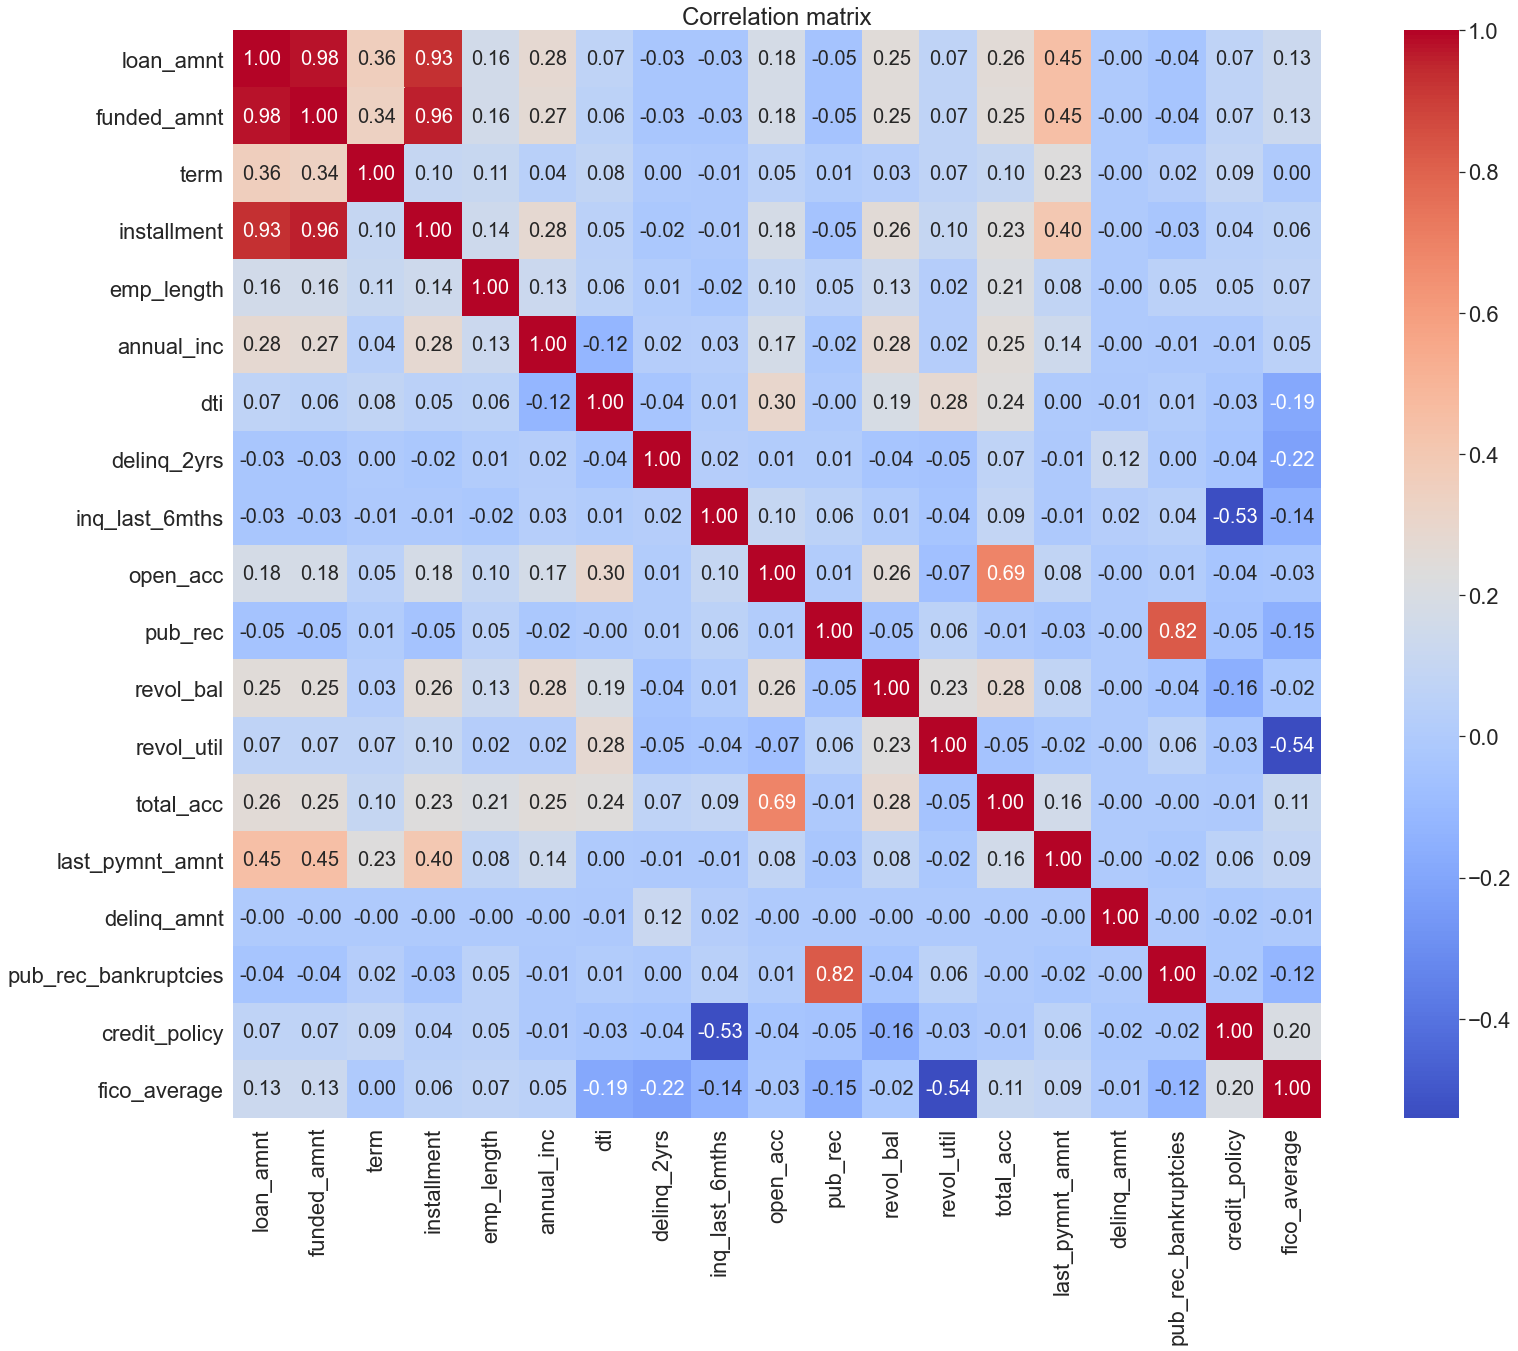

In [12]:
# Generating plot
plt.figure(figsize=(30,20))
sns.set(font_scale= 2)
sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f',
            annot_kws={'size': 20},
            cmap='coolwarm',
            yticklabels=corr.columns,
            xticklabels=corr.columns)
plt.title('Correlation matrix')

Among the linearly correlated features are:

- installment vs loan_amnt (0.93)
- pub_rec_bankruptcies vs pub_rec (0.82)
- total_acc vs open_acc (0.69)
- inq_last_6_mths vs credit_policy (-0.53)
- revol_util vs fico_average (-0.54)

In order to investigate the relationship between potential targets, the most important columns will be selected and subjected for quick exploration. Also, part of the columns include nominal features, therefore, they will be converted into numerical features by using dummy variables and then correlated.

In [13]:
# Selecting the columns for exploration
explore_loans = filtered_loans[['loan_status', 'loan_amnt', 'installment', 'annual_inc', 'dti', 'grade', 'purpose', 'home_ownership', 'verification_status', 'fico_average','FICO_Score_group', 'term']]

In [14]:
# Converting nominal features into numerical features by using dummy variables
dummy_filtered_loans = pd.get_dummies(explore_loans)
dummy_filtered_loans.head()

loan_amnt  installment  annual_inc    dti  fico_average  term  \
0     5000.0       162.87     24000.0  27.65         737.0    36   
1     2500.0        59.83     30000.0   1.00         742.0    60   
2     2400.0        84.33     12252.0   8.72         737.0    36   
3    10000.0       339.31     49200.0  20.00         692.0    36   
4     3000.0        67.79     80000.0  17.94         697.0    60   

   loan_status_Charged Off  loan_status_Fully Paid  grade_A  grade_B  ...  \
0                        0                       1        0        1  ...   
1                        1                       0        0        0  ...   
2                        0                       1        0        0  ...   
3                        0                       1        0        0  ...   
4                        0                       1        0        1  ...   

   home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  \
0                     0                   0                    1   
1                     0                   0                    1   
2                     0                   0                    1   
3                     0                   0                    1   
4                     0                   0                    1   

   verification_status_Not Verified  verification_status_Source Verified  \
0                                 0                                    0   
1                                 0                                    1   
2                                 1                                    0   
3                                 0                                    1   
4                                 0                                    1   

   verification_status_Verified  FICO_Score_group_Exceptional  \
0                             1                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   FICO_Score_group_Fair  FICO_Score_group_Good  FICO_Score_group_Very Good  
0                      0                      1                           0  
1                      0                      0                           1  
2                      0                      1                           0  
3                      0                      1                           0  
4                      0                      1                           0  

[5 rows x 41 columns]

In [15]:
# Quick overview of correltion with dummy variables
corr_dummy = dummy_filtered_loans.corr().round(2)
corr_dummy.T.head()

loan_amnt  installment  annual_inc   dti  fico_average  term  \
loan_amnt          1.00         0.93        0.28  0.07          0.13  0.36   
installment        0.93         1.00        0.28  0.05          0.06  0.10   
annual_inc         0.28         0.28        1.00 -0.12          0.05  0.04   
dti                0.07         0.05       -0.12  1.00         -0.19  0.08   
fico_average       0.13         0.06        0.05 -0.19          1.00  0.00   

              loan_status_Charged Off  loan_status_Fully Paid  grade_A  \
loan_amnt                        0.04                   -0.04    -0.19   
installment                      0.02                   -0.02    -0.18   
annual_inc                      -0.04                    0.04    -0.02   
dti                              0.04                   -0.04    -0.11   
fico_average                    -0.14                    0.14     0.60   

              grade_B  ...  home_ownership_OTHER  home_ownership_OWN  \
loan_amnt       -0.00  ...                 -0.01               -0.03   
installment     -0.01  ...                 -0.00               -0.03   
annual_inc      -0.01  ...                 -0.00               -0.04   
dti              0.00  ...                 -0.01               -0.00   
fico_average     0.13  ...                 -0.01                0.03   

              home_ownership_RENT  verification_status_Not Verified  \
loan_amnt                   -0.16                             -0.32   
installment                 -0.13                             -0.27   
annual_inc                  -0.18                             -0.11   
dti                          0.01                             -0.04   
fico_average                -0.17                             -0.01   

              verification_status_Source Verified  \
loan_amnt                                   -0.08   
installment                                 -0.09   
annual_inc                                  -0.00   
dti                                         -0.06   
fico_average                                -0.02   

              verification_status_Verified  FICO_Score_group_Exceptional  \
loan_amnt                             0.42                          0.01   
installment                           0.37                          0.00   
annual_inc                            0.12                          0.02   
dti                                   0.10                         -0.13   
fico_average                          0.03                          0.31   

              FICO_Score_group_Fair  FICO_Score_group_Good  \
loan_amnt                     -0.09                  -0.02   
installment                   -0.05                   0.00   
annual_inc                    -0.03                  -0.02   
dti                            0.04                   0.15   
fico_average                  -0.46                  -0.45   

              FICO_Score_group_Very Good  
loan_amnt                           0.09  
installment                         0.04  
annual_inc                          0.03  
dti                                -0.15  
fico_average                        0.73  

[5 rows x 41 columns]

Text(0.5, 1.0, 'Correlation matrix with dummy variables')

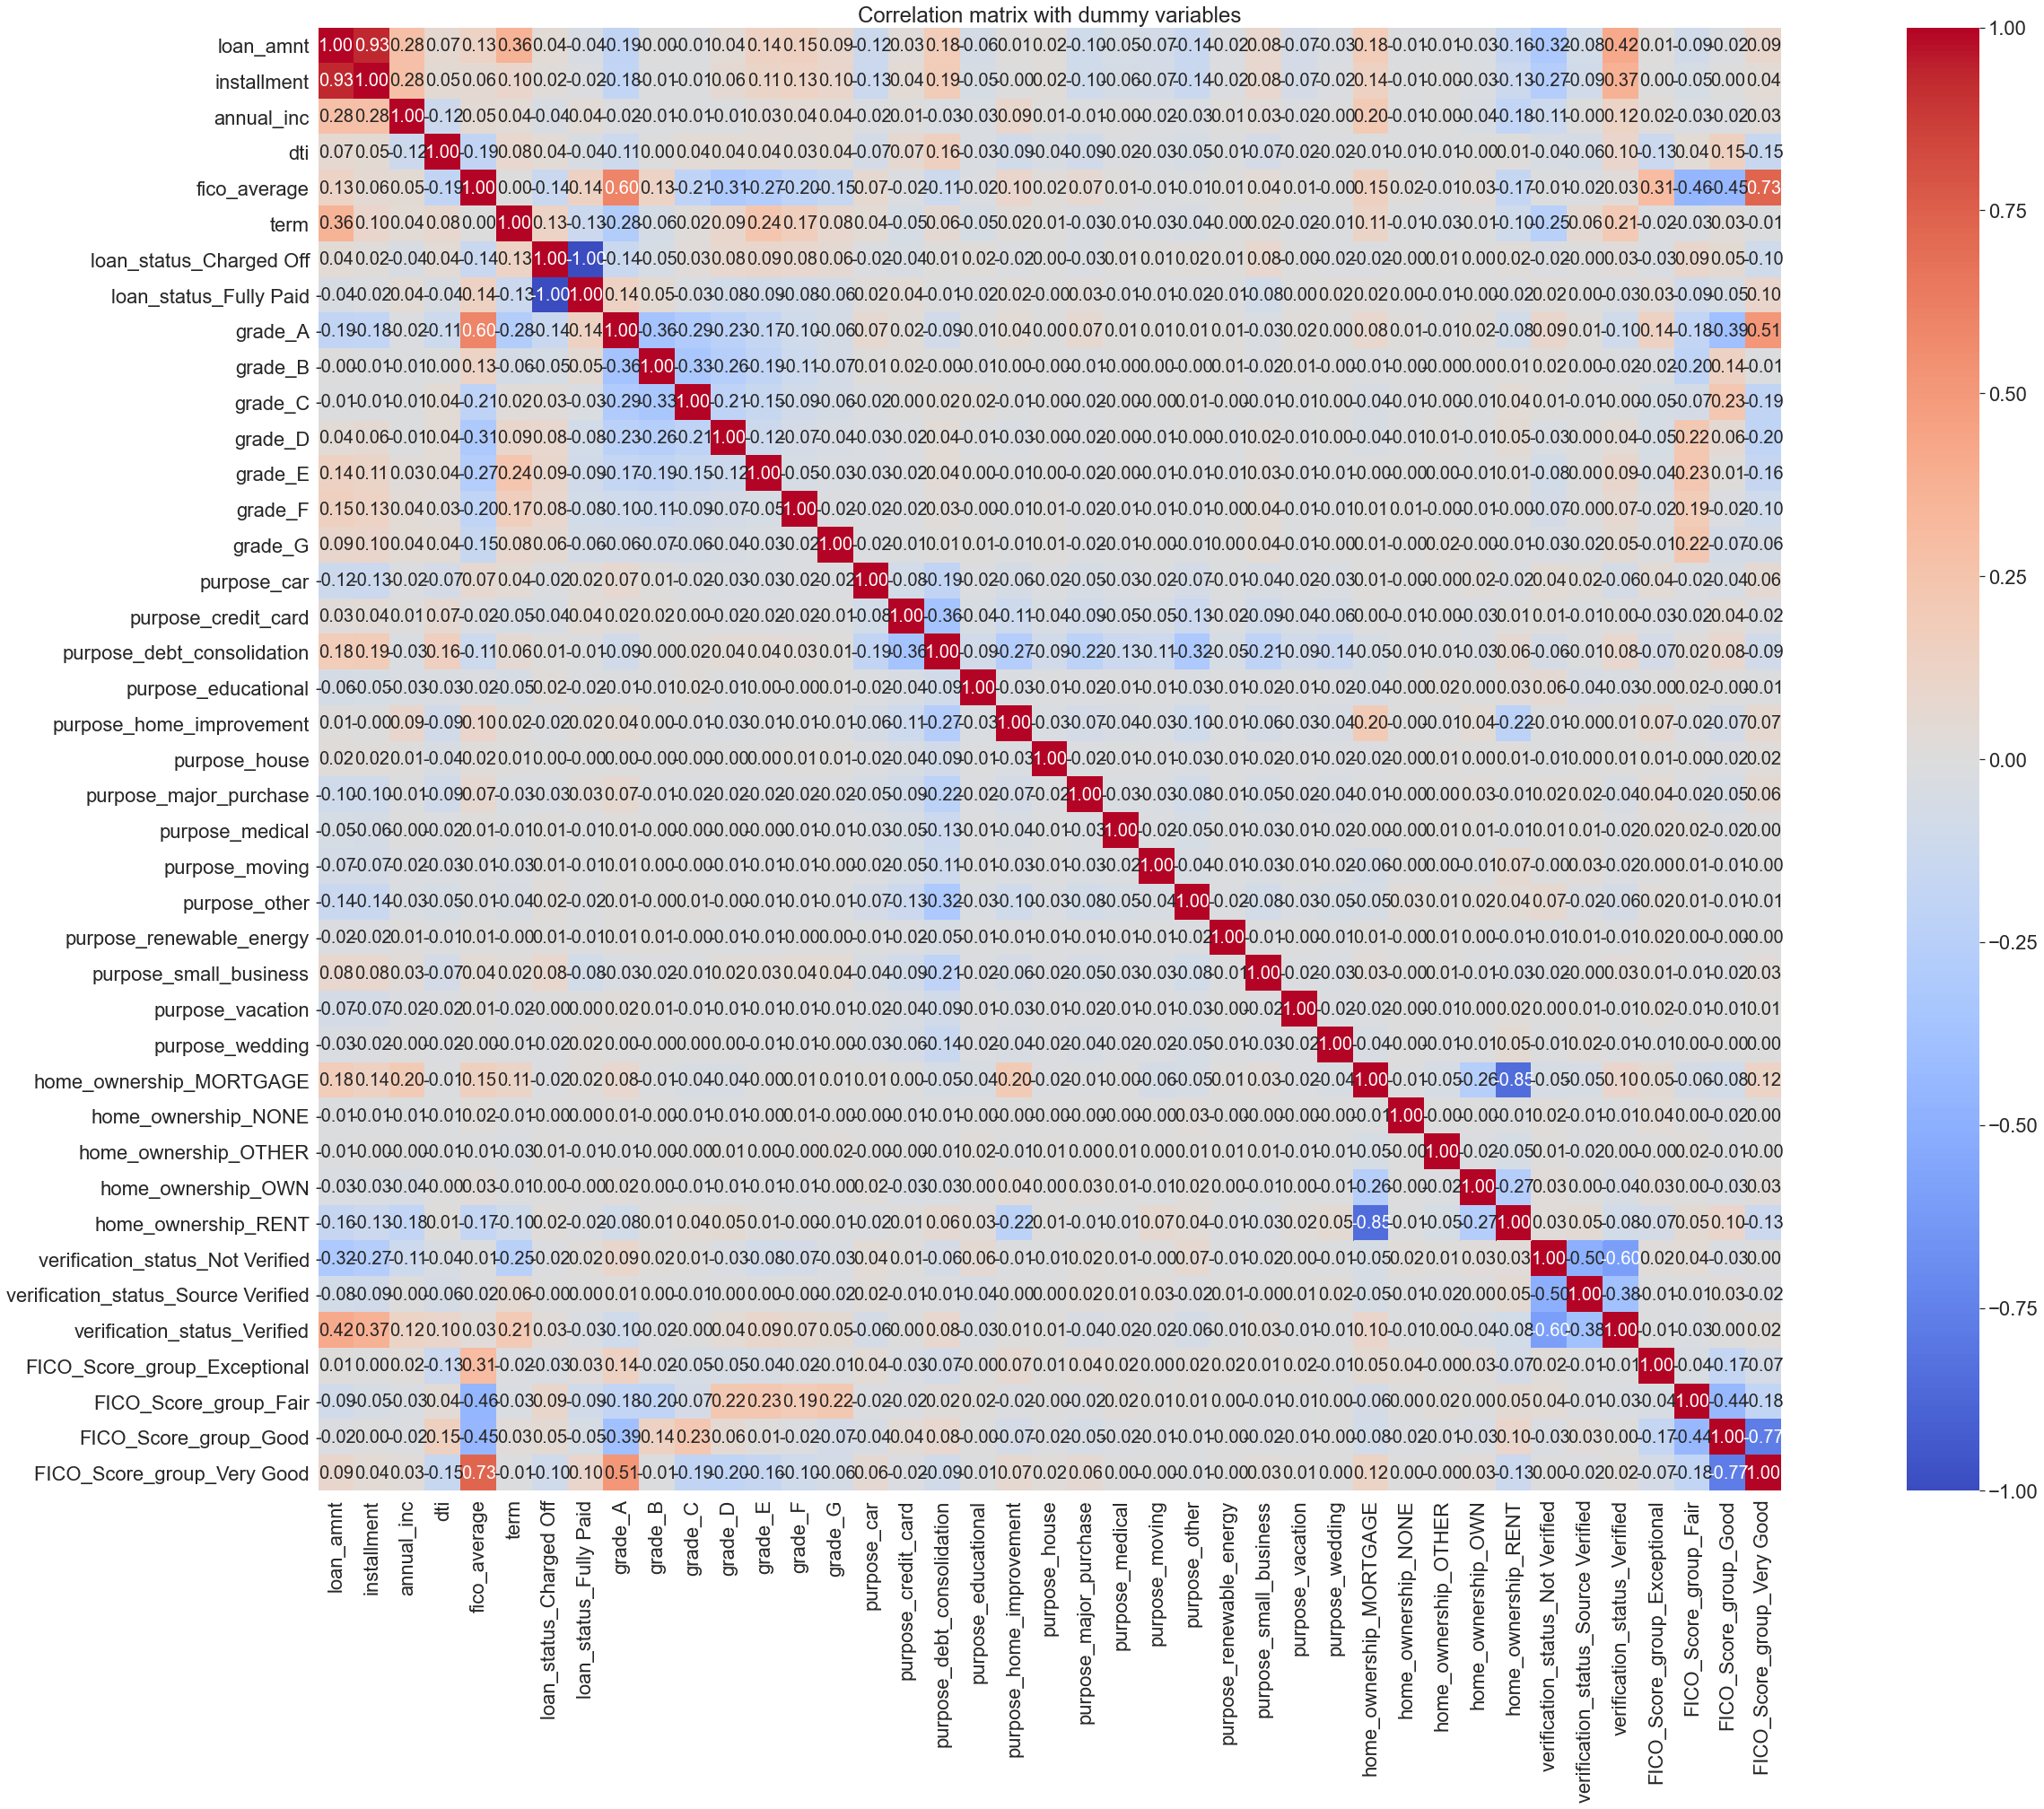

In [16]:
# Generating plot
plt.figure(figsize=(50,30))
sns.set(font_scale= 2)
sns.heatmap(corr_dummy, cbar=True, annot=True, square=True, fmt='.2f',
            annot_kws={'size': 20},
            cmap='coolwarm',
            yticklabels=corr_dummy.columns,
            xticklabels=corr_dummy.columns)
plt.title('Correlation matrix with dummy variables')

- There is no general pattern after converting features to dummy variables.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


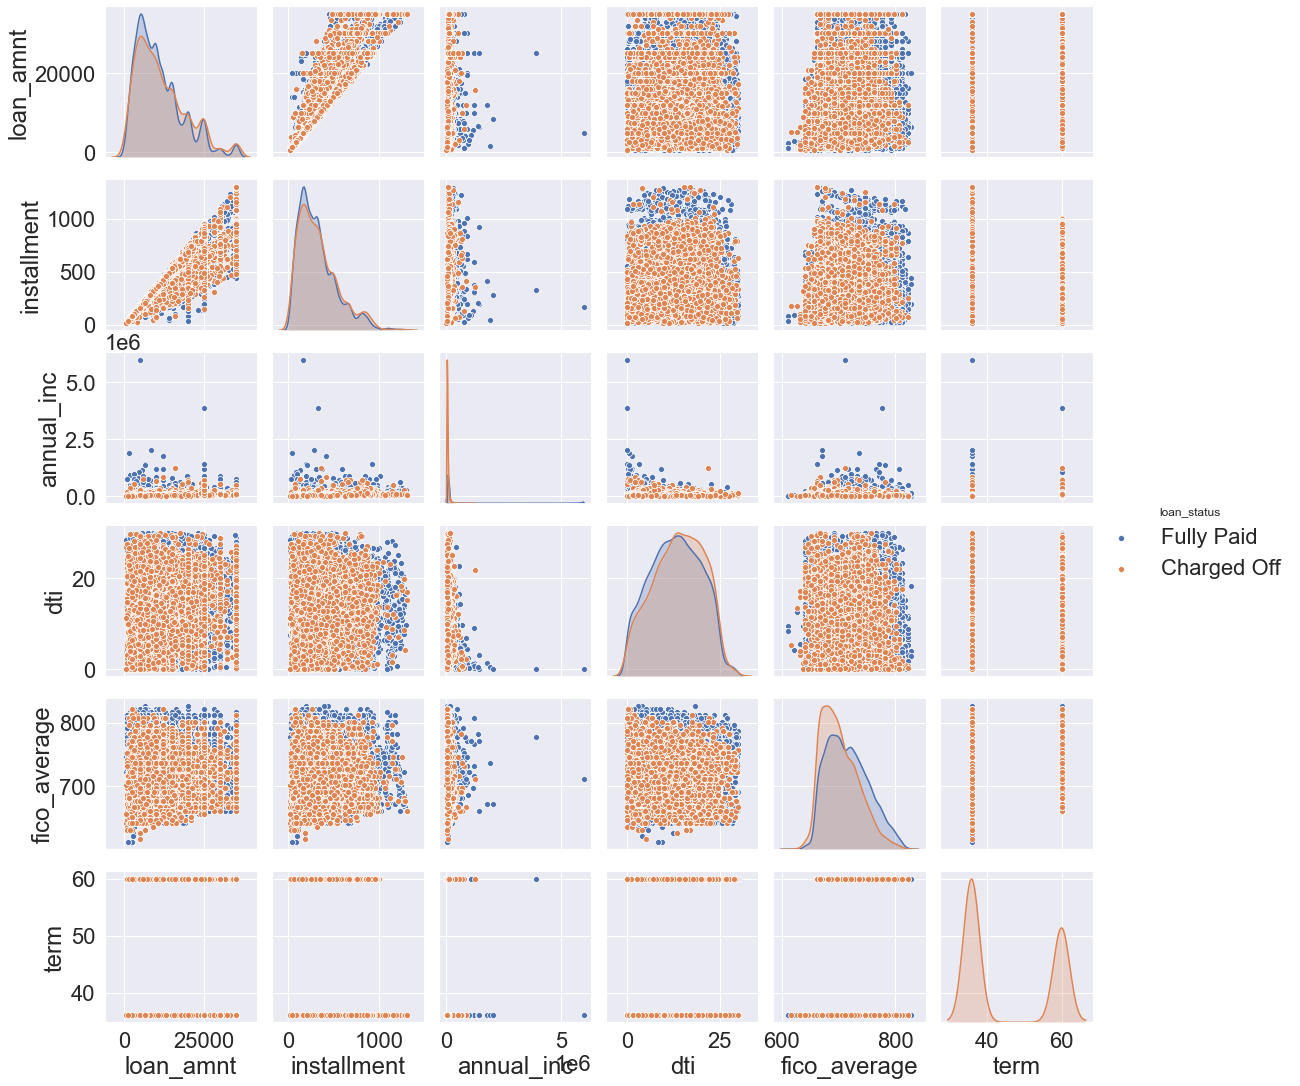

In [17]:
sns.pairplot(explore_loans, hue= 'loan_status', diag_kind='kde')

Distribution of these features in Fully Paid and Charged Off loans is more less similar.

### Questions

### 1. What is the relationship between FICO Score and probability of loan payment?

In [30]:
# Checking fico_average numbers
filtered_loans['fico_average'].describe().round(2).to_frame()

fico_average
count      42535.00
mean         715.05
std           36.19
min          612.00
25%          687.00
50%          712.00
75%          742.00
max          827.00

In [31]:
# Checking fico_average numbers in Fully Paid and Charged Off loans
fico_avg_both = filtered_loans['fico_average'].groupby(filtered_loans['loan_status'])
fico_avg_both.describe()

count        mean        std    min    25%    50%    75%    max
loan_status                                                                   
Charged Off   6431.0  702.883999  32.152072  617.0  677.0  697.0  722.0  822.0
Fully Paid   36104.0  717.220059  36.437532  612.0  687.0  712.0  742.0  827.0

Distribution of fico_average score is approximately symmetric. Skewness is 0.46


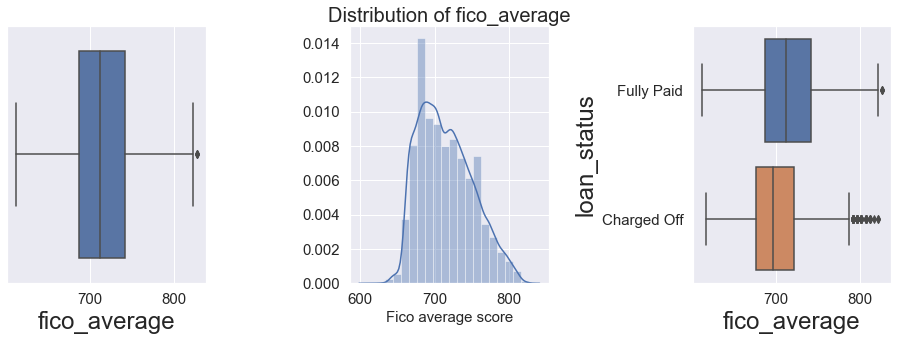

In [32]:
# Data distribution and skewness value for fico_average score
fig, (ax1,ax2, ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='fico_average', data=filtered_loans, orient='h', ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(filtered_loans['fico_average'],ax=ax2, bins = 20)
ax2.set_xlabel('Fico average score', fontsize=15)
ax2.tick_params(labelsize=15)

#boxplot fico_average by the loan_status
sns.boxplot(x='fico_average', y= 'loan_status', data=filtered_loans, ax=ax3)
ax3.tick_params(labelsize=15)

fig.suptitle('Distribution of fico_average', fontsize=20)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

skewness = filtered_loans['fico_average'].skew().round(2)
print('Distribution of fico_average score is approximately symmetric. Skewness is', skewness)

In [33]:
# Outlier calculation by using IQR method
Q1 = filtered_loans['fico_average'].quantile(0.25)
Q3 = filtered_loans['fico_average'].quantile(0.75)
IQR = Q3 - Q1

print('Range of values is: ', filtered_loans['fico_average'].max()-filtered_loans['fico_average'].min())
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print("The interquartile range (IQR) for fico_average is", IQR)

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
                   
print('Lower outliers in fico_average: ', L_outliers)
print('Upper outliers in fico_average: ', U_outliers)
print('Number of outliers in fico_average upper : ', filtered_loans[filtered_loans['fico_average']> U_outliers]['fico_average'].count())
print('Number of outliers in fico_average lower : ', filtered_loans[filtered_loans['fico_average']< L_outliers]['fico_average'].count())
print('% of Outlier in fico_average upper: ',round(filtered_loans[filtered_loans['fico_average']> U_outliers]['fico_average'].count()*100/len(filtered_loans)), '%')
print('% of Outlier in fico_average lower: ',round(filtered_loans[filtered_loans['fico_average']< L_outliers]['fico_average'].count()*100/len(filtered_loans)), '%')

Range of values is:  215.0
1st Quartile (Q1) is:  687.0
3st Quartile (Q3) is:  742.0
The interquartile range (IQR) for fico_average is 55.0
Lower outliers in fico_average:  604.5
Upper outliers in fico_average:  824.5
Number of outliers in fico_average upper :  3
Number of outliers in fico_average lower :  0
% of Outlier in fico_average upper:  0.0 %
% of Outlier in fico_average lower:  0.0 %


In [34]:
# Investigating 3 upper outliers in fico_average 
fico_avg_outliers = filtered_loans[filtered_loans['fico_average']> U_outliers]['fico_average']
fico_avg_outliers

5978     827.0
7017     827.0
38195    827.0
Name: fico_average, dtype: float64

In [35]:
# Details of 3 outliers 
filtered_loans[((filtered_loans['fico_average']- filtered_loans['fico_average'].mean()) / filtered_loans['fico_average'].std()) > 3]

loan_amnt  funded_amnt  term  installment grade sub_grade  \
5978     20000.0      20000.0    60       441.97     B        B3   
7017      6425.0       6425.0    36       195.55     A        A1   
38195    20000.0      12000.0    36       390.09     B        B2   

                          emp_title  emp_length home_ownership  annual_inc  \
5978                              0           0            OWN     40000.0   
7017     Bell Shoals Baptist Church           5       MORTGAGE    113000.0   
38195  Hospice of Santa Cruz County           5       MORTGAGE    150000.0   

       ... total_acc last_pymnt_amnt last_credit_pull_d delinq_amnt  \
5978   ...      23.0        20196.40         2011-11-01         0.0   
7017   ...      28.0          199.49         2014-10-01         0.0   
38195  ...      23.0         5380.05         2010-10-01         0.0   

      pub_rec_bankruptcies debt_settlement_flag  loan_status  credit_policy  \
5978                   0.0                    N   Fully Paid              1   
7017                   0.0                    N   Fully Paid              1   
38195                  0.0                    N   Fully Paid              1   

      fico_average  FICO_Score_group  
5978         827.0       Exceptional  
7017         827.0       Exceptional  
38195        827.0       Exceptional  

[3 rows x 34 columns]

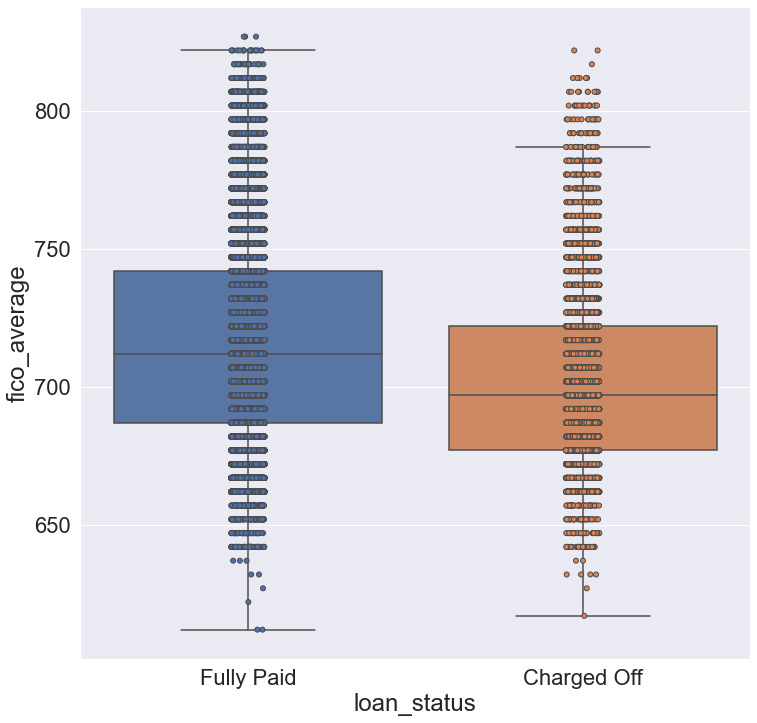

In [36]:
# Boxplot showing outliers in fico_average grouped by loan status 
plt.subplots(1,figsize=(12,12))
ax = sns.boxplot(x= 'loan_status', y= 'fico_average', data=filtered_loans, showfliers = False)
ax = sns.stripplot(x= 'loan_status', y= 'fico_average', data=filtered_loans, jitter = 0.05, linewidth=1)

- Based on the figure above, there is a minor difference in mean and IQR between fico_average score in 'Fully Paid' and 'Charged Off' loans. 
- In order to set the null hypothesis (that there is no difference in FICO scores and the loan payment), brief calculations will be performed.

#### Null hypothesis: there is no difference in FICO scores and the loan payment

In [37]:
# Calculating statistics for fico_average
fico_fullypaid = filtered_loans.loc[filtered_loans['loan_status'] == 'Fully Paid', 'fico_average'].describe().reset_index(name = 'Fully Paid loans info')
fico_chargedoff = filtered_loans.loc[filtered_loans['loan_status'] == 'Charged Off', 'fico_average'].describe().reset_index(name = 'Charged Off loans info')
fico_status_mean_comparison = fico_fullypaid.merge(fico_chargedoff)
fico_status_mean_comparison.round(2)

index  Fully Paid loans info  Charged Off loans info
0  count               36104.00                 6431.00
1   mean                 717.22                  702.88
2    std                  36.44                   32.15
3    min                 612.00                  617.00
4    25%                 687.00                  677.00
5    50%                 712.00                  697.00
6    75%                 742.00                  722.00
7    max                 827.00                  822.00

In [38]:
# Calculating skewness for fico_average
fico_fullypaid_skew = fico_fullypaid.skew().round(2)
fico_chargedoff_skew = fico_chargedoff.skew().round(2)
print('fico average skew for Fully Paid loans:', float(fico_fullypaid_skew))
print('fico average skew for Charged Off loans:', float(fico_chargedoff_skew))

fico average skew for Fully Paid loans: 2.83
fico average skew for Charged Off loans: 2.75


In [39]:
# Calculating IQR fico_average
Q1_fico_fullypaid = float(fico_fullypaid.quantile(0.25))
Q3_fico_fullypaid = float(fico_fullypaid.quantile(0.75))
IQR_fico_fullypaid = Q3_fico_fullypaid - Q1_fico_fullypaid
print('fico_average IQR for Fully Paid loans is', IQR_fico_fullypaid)

Q1_fico_chargedoff = float(fico_chargedoff.quantile(0.25))
Q3_fico_chargedoff = float(fico_chargedoff.quantile(0.75))
IQR_fico_chargedoff = Q3_fico_chargedoff - Q1_fico_chargedoff
print('fico_average IQR for Charged Off loans is', IQR_fico_chargedoff)

fico_average IQR for Fully Paid loans is 95.0
fico_average IQR for Charged Off loans is 85.0


- Mean values in 'fico_average' in 'Fully Paid' and 'Charged Off' loans are comparable (717.12 and 702.88, respectively). The same situation is observed for skew values in 'Fully Paid' and 'Charged Off' loans (2.83 and 2.75, respectively).

- IQR values in 'fico_average' in 'Fully Paid' and 'Charged Off' loans are also comparable (95.0 and 85.0, respectively).

- Based on the following calculations, I can conclude that 'fico_average' in both groups is highly similar and there is no significant difference. 

#### Null hypothesis: there is no difference in FICO scores, regarding the loan payment.

In [40]:
# Mapping 'fico_average' into FICO_Score_group
# All loans grouped by FICO_Score_group
all_groups_FICO = pd.value_counts((filtered_loans['FICO_Score_group'])).reset_index()
all_groups_FICO = all_groups_FICO.rename(columns={'index': 'FICO_Score_group', 'FICO_Score_group': 'Sum'})
all_groups_FICO = all_groups_FICO.sort_values(by= ['Sum'], ascending = [True])
all_groups_FICO

FICO_Score_group    Sum
3      Exceptional    624
2             Fair   3894
1        Very Good  10171
0             Good  27846

In [41]:
# Contingency table for FICO_Score_group and loan group
FICO_crosstab = pd.crosstab(filtered_loans['FICO_Score_group'], filtered_loans['loan_status']).reset_index()
FICO_crosstab

loan_status FICO_Score_group  Charged Off  Fully Paid
0                Exceptional           34         590
1                       Fair          964        2930
2                       Good         4550       23296
3                  Very Good          883        9288

In [42]:
# Calculating percentage of FICO Score groups per total Fully Paid loans
FICO_all = FICO_crosstab.merge(all_groups_FICO, how = 'left', on = 'FICO_Score_group')
FICO_all['FullyPaid_loans_percent'] = (FICO_all['Fully Paid'] / (FICO_all['Sum']) * 100).round(2)
FICO_all

FICO_Score_group  Charged Off  Fully Paid    Sum  FullyPaid_loans_percent
0      Exceptional           34         590    624                    94.55
1             Fair          964        2930   3894                    75.24
2             Good         4550       23296  27846                    83.66
3        Very Good          883        9288  10171                    91.32

In [43]:
# Again fico_average statistics
filtered_loans['fico_average'].describe().round(2).to_frame()

fico_average
count      42535.00
mean         715.05
std           36.19
min          612.00
25%          687.00
50%          712.00
75%          742.00
max          827.00

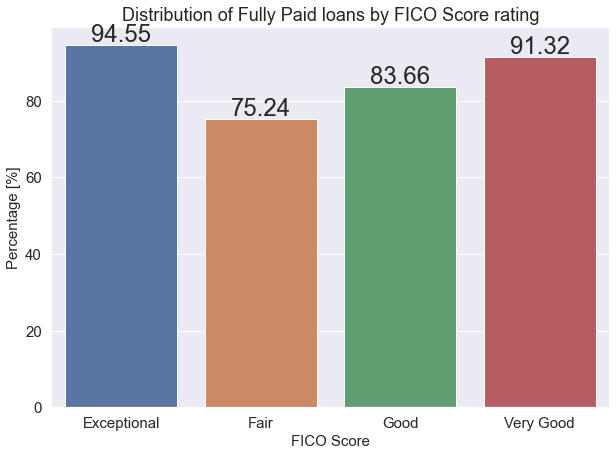

In [44]:
# Plotting Fully_Paid loans with FICO_Score_groups (categorical data)
plt.subplots(1,figsize=(10,7))
ax = sns.barplot(x='FICO_Score_group', y='FullyPaid_loans_percent', data=FICO_all)
ax.set_xlabel('FICO Score', fontsize=15)
ax.set_ylabel('Percentage [%]', fontsize=15)
ax.set_title('Distribution of Fully Paid loans by FICO Score rating', fontsize=18)
ax.tick_params(labelsize=15)

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='center', xytext = (0, 10), textcoords='offset points')

Conclusions:
- Borrowers from higher FICO Score groups (Exceptional and Very Good) are more liable to pay the loan (94.55% and 91.32% of payed loans, respectively). 

- Most of the Fully Paid loans were payed by Exceptional and Very Good borrowers.

- Interestingly, there was a difference of 20 percentage points between Exceptional and Fair borrowers.

- It seems that FICO score is a reliable indicator of loan payment.

### 2. What is the relationship between credit age and probability of loan default? How the risk of loan defualt is related to FICO Score?

Based on the definition, 'credit age' is a specific calculation credit scoring used by the companies to determine borrower's length of credit history. More specifically, it is an average of how long all of borrower's credit accounts have been open. The higher credit age, the better it is for borrower's credit score.

For the purpose of analysis, I will calculate the 'credit' age based on avaialble information:
- issue_d - the month which the loan was funded
- earliest_cr_line - the month the borrower's earliest reported credit line was opened.



In [45]:
from datetime import datetime
# Transform earliest_cr_line to date time
filtered_loans['earliest_cr_line']=pd.to_datetime(filtered_loans['earliest_cr_line'])

Text(0.5, 1.0, 'Distribution of the earliest credit line')

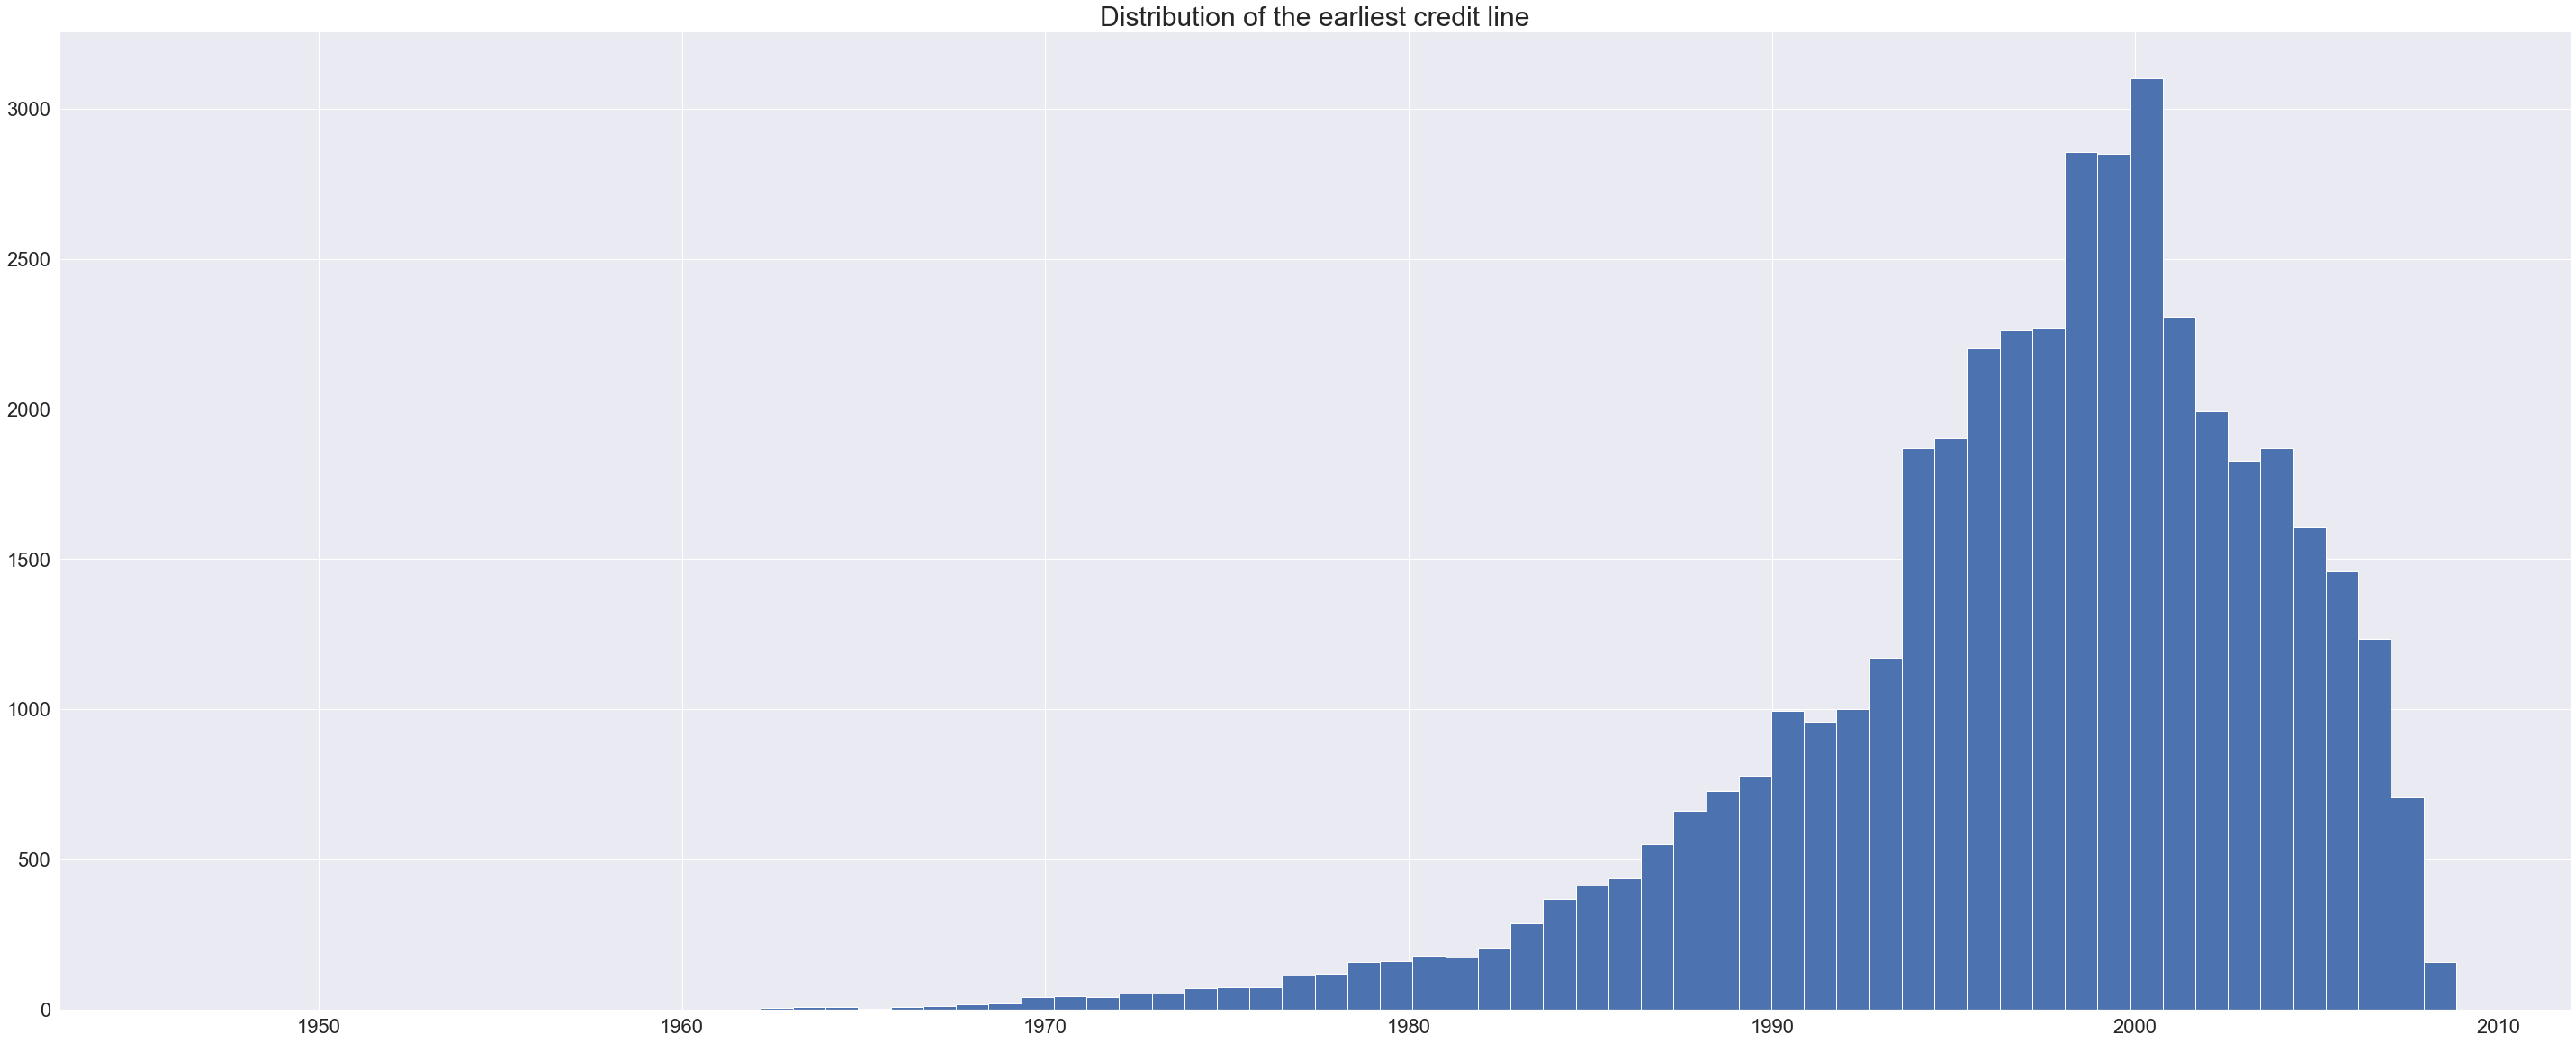

In [46]:
# Distribution of earliest_cr_line 
plt.subplots(figsize = (50, 20))
ax = plt.gca()
ax.hist(filtered_loans['earliest_cr_line'], bins = 70) 
ax.set_title('Distribution of the earliest credit line', fontsize=30)

In [47]:
# Transform to issue_d to date time
filtered_loans['issue_d']=pd.to_datetime(filtered_loans['issue_d'])

Text(0.5, 1.0, 'Distribution of the loan issue date')

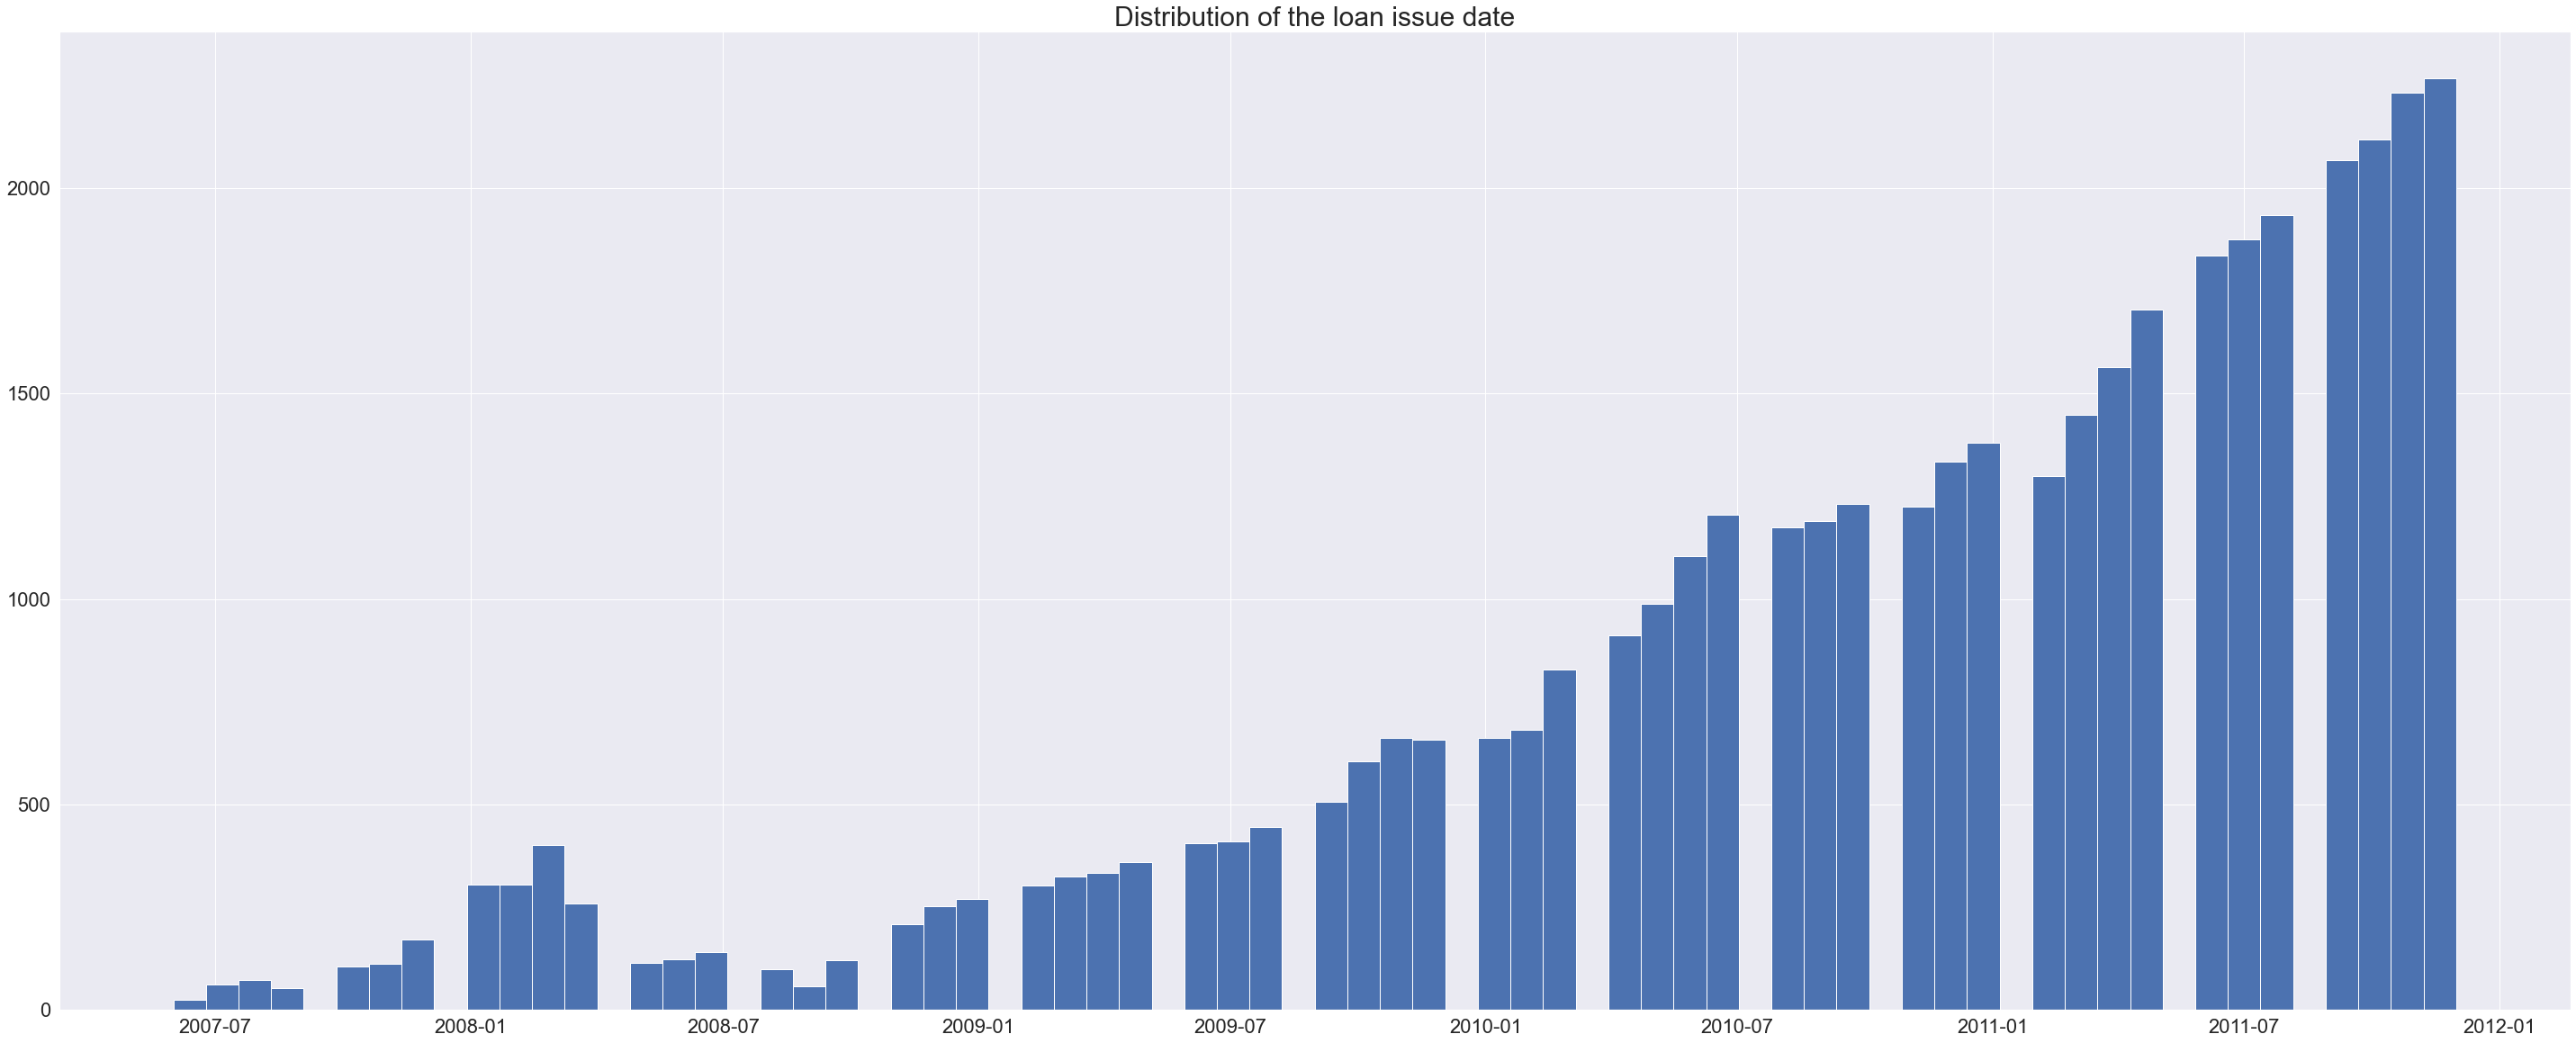

In [48]:
# Distribution of issue_d 
plt.subplots(figsize = (50, 20))
ax = plt.gca()
ax.hist(filtered_loans['issue_d'], bins = 70) 
ax.set_title('Distribution of the loan issue date', fontsize=30)

In [49]:
# Calculating credit age
filtered_loans['credit_age'] = (filtered_loans['issue_d']) - (filtered_loans['earliest_cr_line'])
filtered_loans.head()

loan_amnt  funded_amnt  term  installment grade sub_grade  \
0     5000.0       5000.0    36       162.87     B        B2   
1     2500.0       2500.0    60        59.83     C        C4   
2     2400.0       2400.0    36        84.33     C        C5   
3    10000.0      10000.0    36       339.31     C        C1   
4     3000.0       3000.0    60        67.79     B        B5   

                  emp_title  emp_length home_ownership  annual_inc  ...  \
0                         0          10           RENT     24000.0  ...   
1                     Ryder           0           RENT     30000.0  ...   
2                         0          10           RENT     12252.0  ...   
3       AIR RESOURCES BOARD          10           RENT     49200.0  ...   
4  University Medical Group           1           RENT     80000.0  ...   

  last_pymnt_amnt last_credit_pull_d delinq_amnt pub_rec_bankruptcies  \
0          171.62         2018-08-01         0.0                  0.0   
1          119.66         2016-10-01         0.0                  0.0   
2          649.91         2017-06-01         0.0                  0.0   
3          357.48         2016-04-01         0.0                  0.0   
4           67.30         2018-04-01         0.0                  0.0   

  debt_settlement_flag  loan_status  credit_policy  fico_average  \
0                    N   Fully Paid              1         737.0   
1                    N  Charged Off              1         742.0   
2                    N   Fully Paid              1         737.0   
3                    N   Fully Paid              1         692.0   
4                    N   Fully Paid              1         697.0   

  FICO_Score_group  credit_age  
0             Good   9830 days  
1        Very Good   4627 days  
2             Good   3682 days  
3             Good   5782 days  
4             Good   5813 days  

[5 rows x 35 columns]

In [50]:
filtered_loans['credit_age'].describe()

count                        42535
mean     4989 days 20:19:08.005170
std      2518 days 15:20:42.521749
min                0 days 00:00:00
25%             3287 days 00:00:00
50%             4564 days 00:00:00
75%             6209 days 00:00:00
max            23892 days 00:00:00
Name: credit_age, dtype: object

In [51]:
filtered_loans['credit_age'].astype('timedelta64[D]').head()

0    9830.0
1    4627.0
2    3682.0
3    5782.0
4    5813.0
Name: credit_age, dtype: float64

Text(0.5, 1.0, 'Distribution of the credit age')

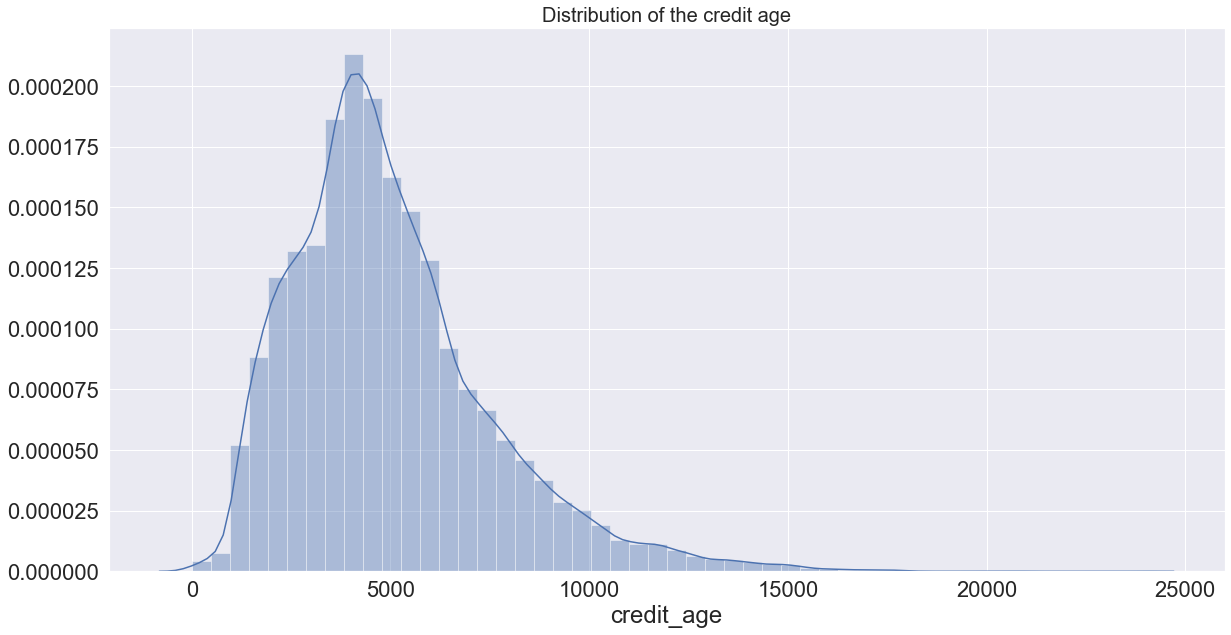

In [52]:
plt.subplots(figsize = (20, 10))
sns.distplot(filtered_loans['credit_age'].astype('timedelta64[D]'))
plt.title('Distribution of the credit age', fontsize=20)

In [53]:
# Outlier calculation by using IQR method
Q1 = filtered_loans['credit_age'].quantile(0.25)
Q3 = filtered_loans['credit_age'].quantile(0.75)
IQR = Q3 - Q1
print('Range of values is: ', filtered_loans['credit_age'].max()-filtered_loans['credit_age'].min())
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print("The interquartile range (IQR) for credit age is", IQR)

# Details of outliers
credit_age_with_outliers = filtered_loans[((filtered_loans['credit_age']- filtered_loans['credit_age'].mean()) / filtered_loans['credit_age'].std()).abs() > 3]
print('Number of outliers in credit age : ', credit_age_with_outliers['credit_age'].count())

Range of values is:  23892 days 00:00:00
1st Quartile (Q1) is:  3287 days 00:00:00
3st Quartile (Q3) is:  6209 days 00:00:00
The interquartile range (IQR) for credit age is 2922 days 00:00:00
Number of outliers in credit age :  560


In [54]:
# Converting credit age to int
filtered_loans['credit_age']= (filtered_loans['credit_age'] / np.timedelta64(1, 'D')).astype(int)

In [55]:
filtered_loans['credit_age'].head()

0    9830
1    4627
2    3682
3    5782
4    5813
Name: credit_age, dtype: int64

Text(0.5, 1.0, 'Distribution of credit age by loan status')

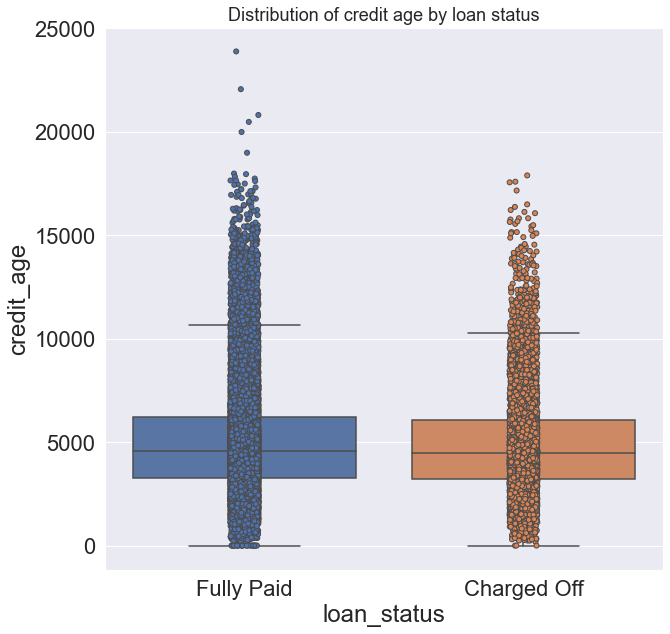

In [56]:
plt.subplots(1,figsize=(10, 10))
ax = sns.boxplot(x= 'loan_status', y= 'credit_age', data=filtered_loans, showfliers = False)
ax = sns.stripplot(x= 'loan_status', y= 'credit_age', data=filtered_loans, jitter = 0.05, linewidth=1)
ax.set_title('Distribution of credit age by loan status', fontsize=18)

- There is a small difference in mean between the longer and shorter borrower's credit age in both loan groups.

#### Checking the oldest and the yongest loans

In [57]:
# Year of the oldest loan
oldest_loan = min(filtered_loans['earliest_cr_line'])
oldest_loan

Timestamp('1946-01-01 00:00:00')

In [58]:
# Year of the youngest loan
youngest_loan = max(filtered_loans['earliest_cr_line'])
youngest_loan

Timestamp('2008-11-01 00:00:00')

In [59]:
# The latest issued loan
latest_issued_loan = max(filtered_loans['issue_d'])
latest_issued_loan

Timestamp('2011-12-01 00:00:00')

In [60]:
# Checking the oldest loan
filtered_loans.loc[(filtered_loans['earliest_cr_line'] == '1946')]

loan_amnt  funded_amnt  term  installment grade sub_grade  emp_title  \
14118     6000.0       6000.0    36       195.27     B        B2  Americold   

       emp_length home_ownership  annual_inc  ... last_pymnt_amnt  \
14118           6       MORTGAGE     33360.0  ...          207.04   

      last_credit_pull_d delinq_amnt pub_rec_bankruptcies  \
14118         2014-09-01         0.0                  0.0   

      debt_settlement_flag loan_status  credit_policy  fico_average  \
14118                    N  Fully Paid              1         712.0   

      FICO_Score_group  credit_age  
14118             Good       23892  

[1 rows x 35 columns]

- This value could be an outlier (too high credit age), however, I will keep it.

#### Null hypothesis: there is no difference in credit age and loan default

- The youngest loan was established in 2011. Considering that the lower age limit for gettinng the loan is 18 years, I will set the cut off date - 1993 (2011- 18 = 1993). Based on this, two groups of borrowers with older and younger credit age will be generated.

In [61]:
# Grouping credit age into older credit age borrowers based on the 1993 cut off
credit_age_older = filtered_loans.loc[filtered_loans['earliest_cr_line'] < '1993']
credit_age_older.describe().round(2)

loan_amnt  funded_amnt     term  installment  emp_length  annual_inc  \
count    9235.00      9235.00  9235.00      9235.00     9235.00     9235.00   
mean    12808.82     12400.96    42.74       364.57        5.96    85582.20   
std      8160.10      7862.78    10.79       230.36        3.90    68489.79   
min       500.00       500.00    36.00        15.76        0.00     6000.00   
25%      6000.00      6000.00    36.00       184.99        2.00    50000.00   
50%     10800.00     10200.00    36.00       316.01        6.00    72000.00   
75%     18000.00     17000.00    60.00       496.14       10.00   101000.00   
max     35000.00     35000.00    60.00      1302.69       10.00  1900000.00   

           dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec   revol_bal  \
count  9235.00      9235.00         9235.00   9235.00  9235.00     9235.00   
mean     13.63         0.20            1.06     10.77     0.06    22337.36   
std       6.76         0.58            1.53      4.89     0.26    34880.46   
min       0.00         0.00            0.00      2.00     0.00        0.00   
25%       8.50         0.00            0.00      7.00     0.00     5878.00   
50%      13.68         0.00            1.00     10.00     0.00    13764.00   
75%      18.85         0.00            2.00     14.00     0.00    26396.50   
max      29.99         9.00           25.00     47.00     4.00  1207359.00   

       revol_util  total_acc  last_pymnt_amnt  delinq_amnt  \
count     9235.00    9235.00          9235.00       9235.0   
mean         0.47      27.59          2836.74          0.0   
std          0.29      12.05          4796.85          0.0   
min          0.00       3.00             0.00          0.0   
25%          0.22      19.00           226.94          0.0   
50%          0.46      26.00           552.46          0.0   
75%          0.70      35.00          3348.62          0.0   
max          1.09      80.00         35613.68          0.0   

       pub_rec_bankruptcies  credit_policy  fico_average  credit_age  
count               9235.00        9235.00       9235.00     9235.00  
mean                   0.05           0.94        726.85     8714.59  
std                    0.22           0.24         39.53     2060.25  
min                    0.00           0.00        642.00     5356.00  
25%                    0.00           1.00        697.00     7243.00  
50%                    0.00           1.00        727.00     8128.00  
75%                    0.00           1.00        757.00     9646.00  
max                    2.00           1.00        827.00    23892.00

In [62]:
# Grouping credit age into younger credit age borrowers based on the 1993 cut off
credit_age_younger= filtered_loans.loc[filtered_loans['earliest_cr_line'] >= '1993']
credit_age_younger.describe().round(2)

loan_amnt  funded_amnt      term  installment  emp_length  annual_inc  \
count   33300.00     33300.00  33300.00     33300.00    33300.00    33300.00   
mean    10612.97     10383.58     42.06       310.99        4.47    64567.42   
std      7116.32      6871.44     10.43       201.04        3.45    62057.45   
min       500.00       500.00     36.00        15.67        0.00        0.00   
25%      5000.00      5000.00     36.00       162.19        2.00    39500.00   
50%      9000.00      9000.00     36.00       268.36        4.00    55000.00   
75%     14600.00     14000.00     60.00       407.09        7.00    77237.00   
max     35000.00     35000.00     60.00      1305.19       10.00  6000000.00   

            dti  delinq_2yrs  inq_last_6mths  open_acc   pub_rec  revol_bal  \
count  33300.00     33300.00        33300.00  33300.00  33300.00   33300.00   
mean      13.30         0.14            1.09      8.94      0.06   12068.29   
std        6.72         0.49            1.53      4.30      0.24   16093.11   
min        0.00         0.00            0.00      0.00      0.00       0.00   
25%        8.10         0.00            0.00      6.00      0.00    3250.50   
50%       13.41         0.00            1.00      8.00      0.00    7901.00   
75%       18.64         0.00            2.00     11.00      0.00   15164.00   
max       29.95        13.00           33.00     39.00      5.00  394107.00   

       revol_util  total_acc  last_pymnt_amnt  delinq_amnt  \
count    33300.00   33300.00         33300.00     33300.00   
mean         0.50      20.59          2551.27         0.18   
std          0.28      11.00          4261.83        33.17   
min          0.00       0.00             0.00         0.00   
25%          0.27      12.00           206.80         0.00   
50%          0.50      19.00           521.97         0.00   
75%          0.73      27.00          3121.70         0.00   
max          1.19      90.00         36115.20      6053.00   

       pub_rec_bankruptcies  credit_policy  fico_average  credit_age  
count              33300.00       33300.00      33300.00    33300.00  
mean                   0.04           0.94        711.78     3956.87  
std                    0.20           0.25         34.50     1418.11  
min                    0.00           0.00        612.00        0.00  
25%                    0.00           1.00        682.00     2891.00  
50%                    0.00           1.00        707.00     4018.00  
75%                    0.00           1.00        737.00     5052.00  
max                    2.00           1.00        822.00     6908.00

- There are 9,235 borrowers with long credit age and 33,149 borrowers with young credit age.

In [63]:
# Calculating percentage of younger credit age per total credit age
credit_age_younger_percentage= ((credit_age_younger['loan_status'].value_counts()/credit_age_younger['loan_status'].count()*100).round(2)).reset_index()
credit_age_younger_percentage

index  loan_status
0   Fully Paid        84.62
1  Charged Off        15.38

In [64]:
# Calculating percentage of older credit age per total credit age
credit_age_older_percentage= ((credit_age_older['loan_status'].value_counts()/credit_age_older['loan_status'].count()*100).round(2)).reset_index()
credit_age_older_percentage

index  loan_status
0   Fully Paid        85.84
1  Charged Off        14.16

In [65]:
# Rename columns
credit_age_younger_percentage = credit_age_younger_percentage.rename(columns={'index': 'loan status', 'loan_status': 'Percentage_Younger'})
credit_age_younger_percentage

loan status  Percentage_Younger
0   Fully Paid               84.62
1  Charged Off               15.38

In [66]:
# Rename columns
credit_age_older_percentage = credit_age_older_percentage.rename(columns={'index': 'loan status', 'loan_status': 'Percentage_Older'})
credit_age_older_percentage

loan status  Percentage_Older
0   Fully Paid             85.84
1  Charged Off             14.16

In [67]:
# Merge 
credit_age_younger_vs_older = credit_age_younger_percentage.merge(credit_age_older_percentage, how = 'left', on = 'loan status')
credit_age_younger_vs_older

loan status  Percentage_Younger  Percentage_Older
0   Fully Paid               84.62             85.84
1  Charged Off               15.38             14.16

- There is no difference in credit age and specific loan group. Percenatge values are very similar.

#### Investigating the relationship between the credit age and FICO Score in loan default

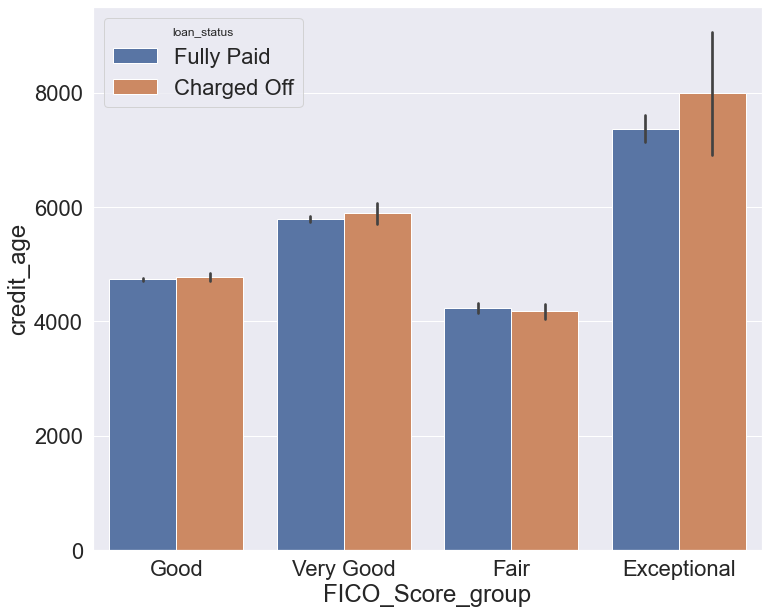

In [68]:
# Distribution of the FICO Score vs loan_amnt
plt.subplots(1, figsize=(12,10))
sns.barplot('FICO_Score_group', 'credit_age', data=filtered_loans, hue = 'loan_status');

- Credit age in paid and charged off loans is very similar in 'Good', 'Very Good' and 'Fair' FICO Score groups.
- Credit age in Exceptional FICO Score group in higher in borrowers which are not paying the loans. However, it is important to notice that this group contains a lot of outliers in Charged Off loans.

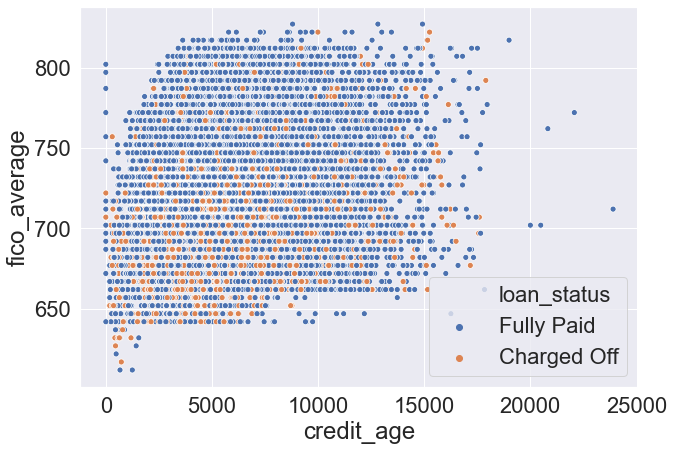

In [69]:
# Scatterplot fico average and credit age
plt.subplots(figsize = (10, 7))
sns.scatterplot('credit_age', 'fico_average', data=filtered_loans, hue = filtered_loans['loan_status'])

- There is no relationship between the credit age and FICO score.

### 3. What is the relationship between home ownership (mortgage) and probability of loan default?

In [70]:
# Overview of home_ownership values
all_houses = pd.value_counts((filtered_loans['home_ownership'])).reset_index()
all_houses = all_houses.rename(columns={'index': 'home_ownership', 'home_ownership': 'Sum'})
all_houses = all_houses.sort_values(by= ['Sum'], ascending = True)
all_houses

home_ownership    Sum
4           NONE      8
3          OTHER    136
2            OWN   3251
1       MORTGAGE  18959
0           RENT  20181

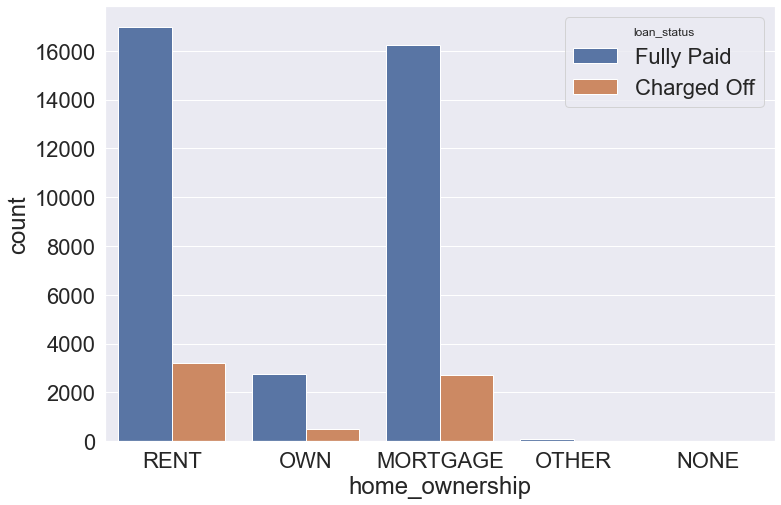

In [71]:
# Plotting home_ownership
plt.subplots(1, figsize=(12,8))
sns.countplot(filtered_loans['home_ownership'], hue = filtered_loans['loan_status'])

- The majority of the borrowers are renting home or have mortgage and they are paiyng their loans.

#### Null hypothesis: there is no difference between the specific type of home ownership and loan default


In [72]:
# Contigency table for home_ownership and loan_status
houses_cross = pd.crosstab(filtered_loans['home_ownership'], filtered_loans['loan_status']).reset_index()
houses_cross

loan_status home_ownership  Charged Off  Fully Paid
0                 MORTGAGE         2699       16260
1                     NONE            1           7
2                    OTHER           29         107
3                      OWN          495        2756
4                     RENT         3207       16974

In [73]:
# Calculating the total number of home_ownership loans per loan group and per home_ownership type
home_ow_all = filtered_loans.groupby(['home_ownership', 'loan_status']).size().reset_index(name= 'Count')
home_ow_all

home_ownership  loan_status  Count
0       MORTGAGE  Charged Off   2699
1       MORTGAGE   Fully Paid  16260
2           NONE  Charged Off      1
3           NONE   Fully Paid      7
4          OTHER  Charged Off     29
5          OTHER   Fully Paid    107
6            OWN  Charged Off    495
7            OWN   Fully Paid   2756
8           RENT  Charged Off   3207
9           RENT   Fully Paid  16974

- Since, question is related to loan default, I will focus on 'Charged Off' group of loans and their home_ownership category

In [74]:
# Calculating percentage of home_ownership per total Charged Off loans
all_houses_chargedoff = all_houses.merge(houses_cross, how = 'left', on = 'home_ownership')
all_houses_chargedoff['houses_ChargedOff_loans_percent'] = (all_houses_chargedoff['Charged Off'] / (all_houses_chargedoff['Sum']) * 100).round(2)
all_houses_chargedoff  

home_ownership    Sum  Charged Off  Fully Paid  \
0           NONE      8            1           7   
1          OTHER    136           29         107   
2            OWN   3251          495        2756   
3       MORTGAGE  18959         2699       16260   
4           RENT  20181         3207       16974   

   houses_ChargedOff_loans_percent  
0                            12.50  
1                            21.32  
2                            15.23  
3                            14.24  
4                            15.89

- Funded amount of loan will be also added to the analysis.

In [75]:
# Calculating the funded loan amount per specific home_ownership
all_houses_amnt_mln = (filtered_loans.groupby('home_ownership')['funded_amnt'].sum() / 1000000).reset_index()
all_houses_amnt_mln = all_houses_amnt_mln.rename(columns={'funded_amnt': 'funded_loan_mln'})
all_houses_amnt_mln

home_ownership  funded_loan_mln
0       MORTGAGE       231.521600
1           NONE         0.057000
2          OTHER         1.264325
3            OWN        32.449775
4           RENT       195.003450

In [76]:
# Checking the funded loan amount per home_ownership
houses_final = all_houses_chargedoff.merge(all_houses_amnt_mln, how = 'left', on = 'home_ownership')
houses_final

home_ownership    Sum  Charged Off  Fully Paid  \
0           NONE      8            1           7   
1          OTHER    136           29         107   
2            OWN   3251          495        2756   
3       MORTGAGE  18959         2699       16260   
4           RENT  20181         3207       16974   

   houses_ChargedOff_loans_percent  funded_loan_mln  
0                            12.50         0.057000  
1                            21.32         1.264325  
2                            15.23        32.449775  
3                            14.24       231.521600  
4                            15.89       195.003450

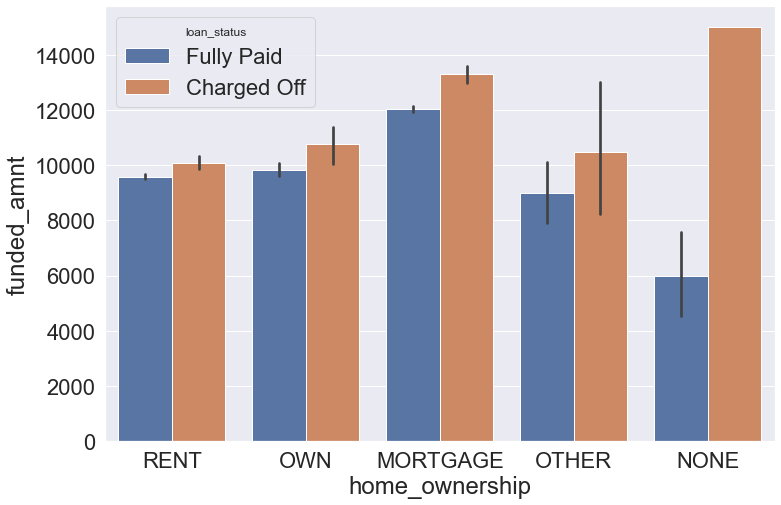

In [77]:
# Distribution of the home_ownership vs loan_amnt
plt.subplots(1, figsize=(12,8))
sns.barplot('home_ownership','funded_amnt',data=filtered_loans, hue = 'loan_status');

- Funded amount of loan is different in each type of home ownership.
- The highest fully paid funded amount of loans was granted to borrowers with mortgage. Interestingly, borrowers with missing information about home ownership received the highest loan amount and they did not pay this loan.

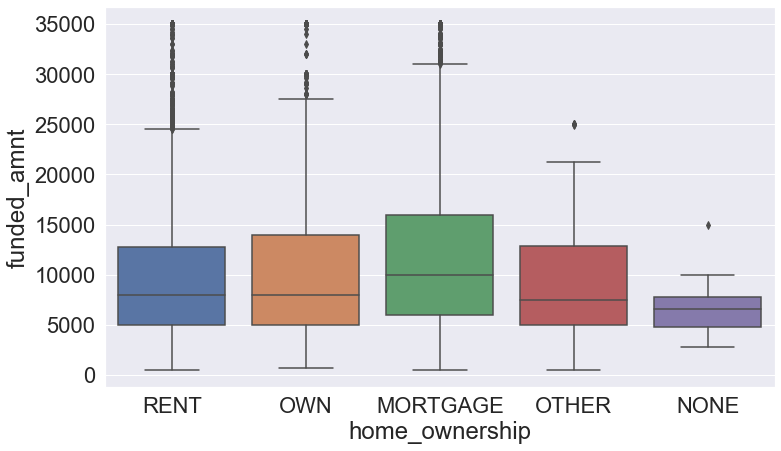

In [78]:
plt.subplots(1, figsize=(12,7))
sns.boxplot('home_ownership','funded_amnt',data=filtered_loans);

- Borrowers receive a higher mean amount if they have a mortgage and receive the least mean amount if they are renting. There are many outliers in funded amount for those who are renting houses.

#### Probability of loan default and home_ownership: mortgage

In [79]:
# Calculating the conditional probability of loan default and home_ownership: mortgage
houses_cross_transpose = pd.crosstab(filtered_loans['loan_status'], filtered_loans['home_ownership']).reset_index()
houses_cross_transpose

home_ownership  loan_status  MORTGAGE  NONE  OTHER   OWN   RENT
0               Charged Off      2699     1     29   495   3207
1                Fully Paid     16260     7    107  2756  16974

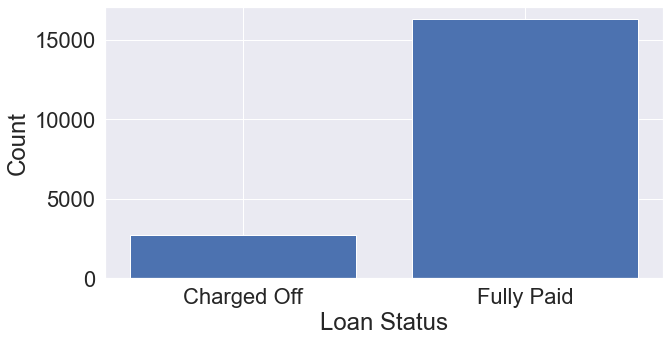

In [80]:
# Specially interest is for the mortgage loans
plt.subplots(1,figsize=(10,5))
plt.bar(houses_cross_transpose['loan_status'], houses_cross_transpose['MORTGAGE'])
plt.ylabel('Count')
plt.xlabel('Loan Status');

In [81]:
home_mortage_percentage = (houses_cross_transpose.loc[houses_cross_transpose.loan_status == 'Charged Off', 'MORTGAGE'].sum()/houses_cross_transpose.MORTGAGE.sum()*100).round(2)
print('Probability of loan default for the mortage is low:', home_mortage_percentage, '%.')

Probability of loan default for the mortage is low: 14.24 %.


#### Chi-square test to investigate wheter there is an association between the loan payment and loan default under the house mortgage category

In [85]:
# Chi-square test of independence of variables in a contingency table.
from scipy.stats import chi2_contingency

obs = np.array([[houses_final['Fully Paid']], [houses_final['Charged Off']]])
chi2_3, p3, dof, ex = chi2_contingency(obs, correction=False)
print('Chi-square value is:', chi2_3.round(2))
print('Test result is significant: p-value =', p3.round(7))
print('There is no difference difference between Fully Paid and Charged Off loans among the mortage owners.')
print('Null hypothesis is supported.')

Chi-square value is: 25.05
Test result is significant: p-value = 4.92e-05
There is no difference difference between Fully Paid and Charged Off loans among the mortage owners.
Null hypothesis is supported.


### 4. What is the relationship between the annual income and probability of loan default?

In [86]:
# Checking annual income of the borrowers
filtered_loans['annual_inc'].describe()

count    4.253500e+04
mean     6.913005e+04
std      6.409684e+04
min      0.000000e+00
25%      4.000000e+04
50%      5.900000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

Distribution of annual income is right-skewed. Skewness is 29.03


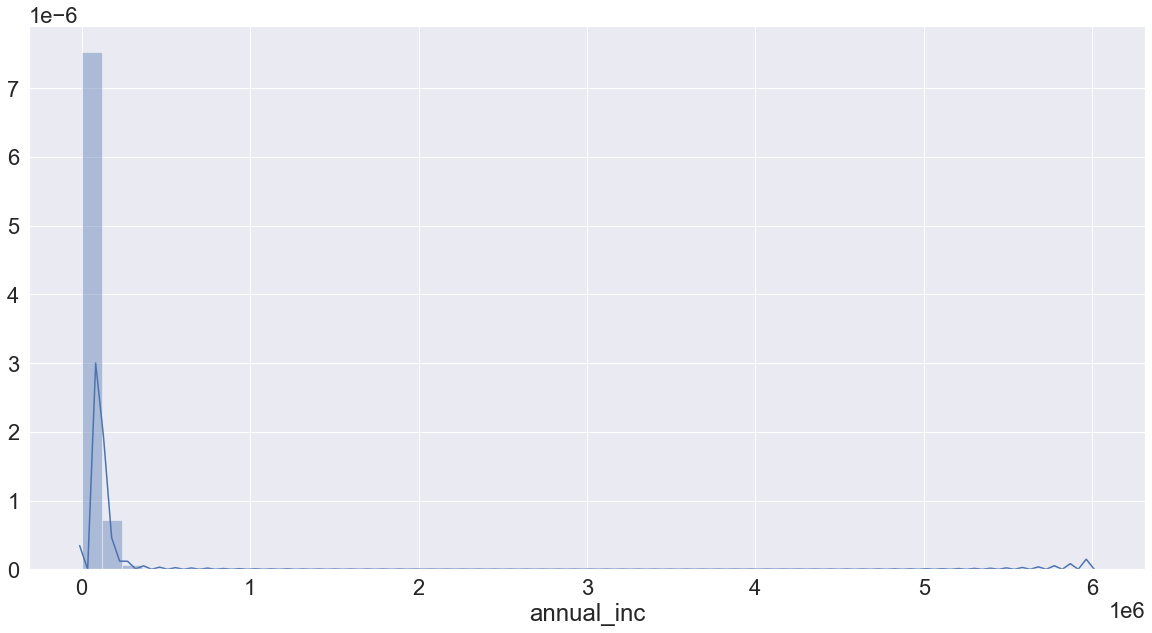

In [87]:
# Distribution of the annual income
plt.subplots(figsize = (20, 10))
sns.distplot(filtered_loans['annual_inc'])

# Skew value of the annual income
skewness_annual_inc = filtered_loans['annual_inc'].skew().round(2)
print('Distribution of annual income is right-skewed. Skewness is', skewness_annual_inc)

Text(0.5, 1.0, 'Distribution of annual income WITH outliers by loan status')

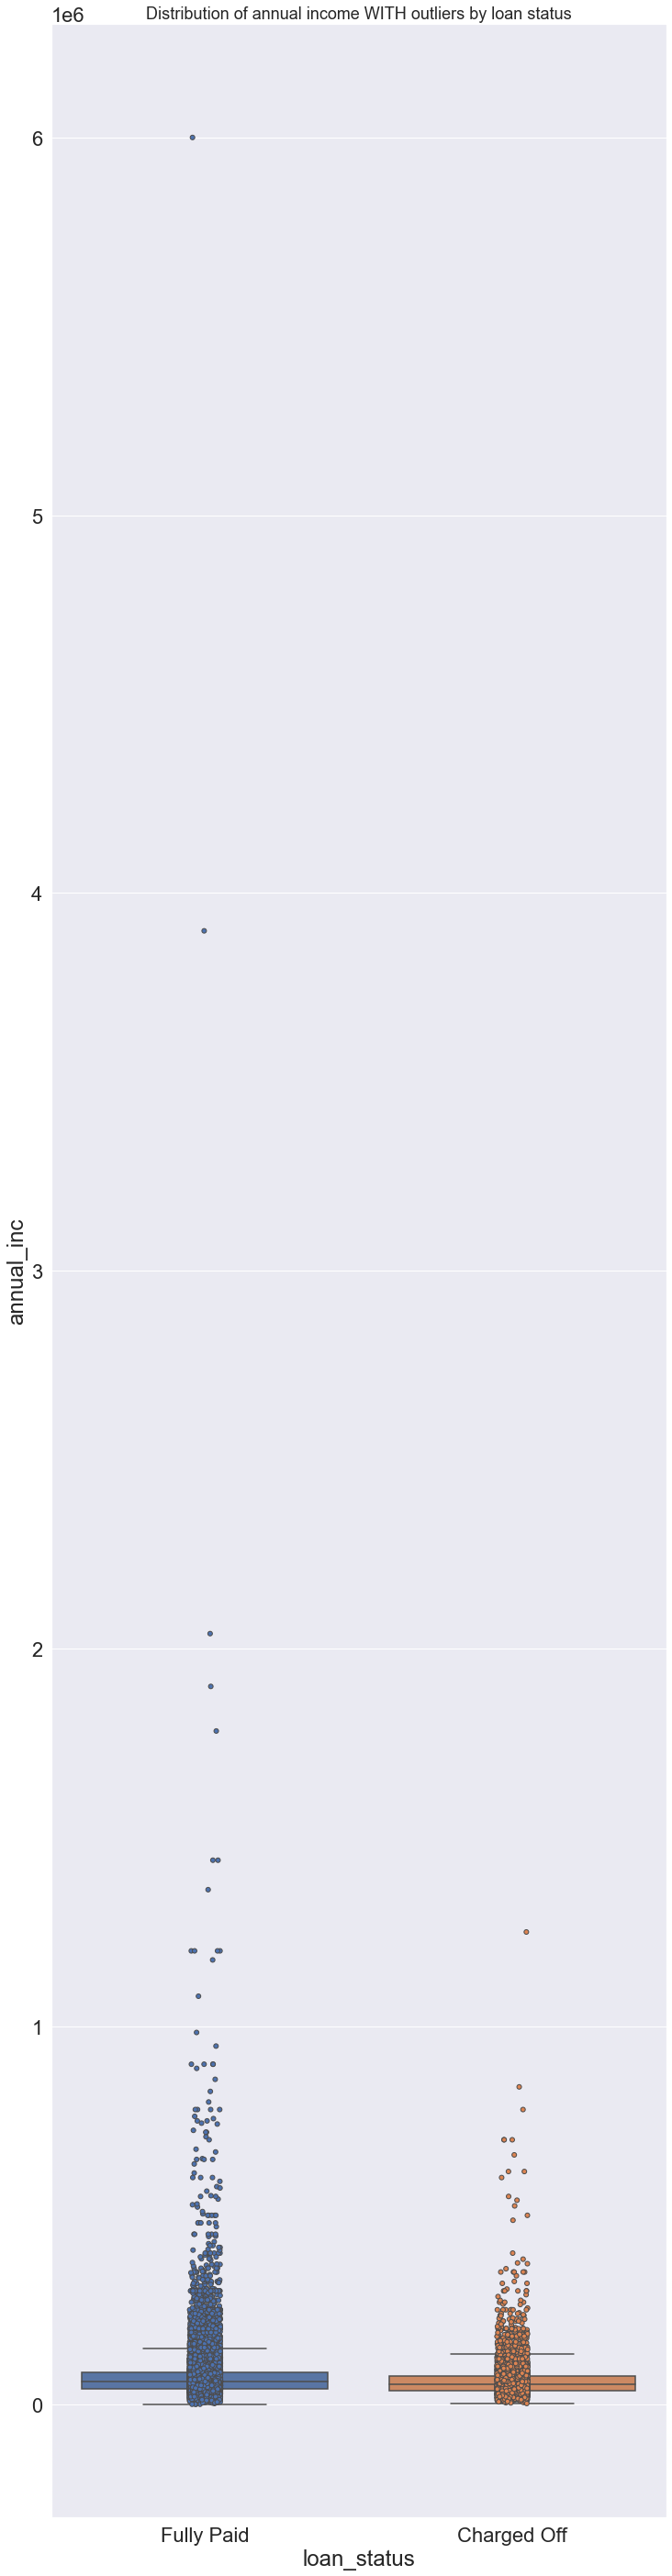

In [88]:
# Checking annual income with outliers
# Boxplot showing outliers in annual_inc grouped by loan status 
plt.subplots(1,figsize=(12,50))
ax = sns.boxplot(x= 'loan_status', y= 'annual_inc', data=filtered_loans, showfliers = False)
ax = sns.stripplot(x= 'loan_status', y= 'annual_inc', data=filtered_loans, jitter = 0.05, linewidth=1)
ax.set_title('Distribution of annual income WITH outliers by loan status', fontsize=18)


- Borrowers which did not pay their loans have slightly lower mean of annual income.

In [89]:
# Grouping annual income into paid and charged off loans
annual_income_chargedoff= filtered_loans.loc[filtered_loans['loan_status'] == 'Charged Off']
annual_income_chargedoff['annual_inc'].describe().round(2)

count       6431.00
mean       63366.87
std        49684.10
min         2000.00
25%        37000.00
50%        53000.00
75%        75000.00
max      1250000.00
Name: annual_inc, dtype: float64

In [90]:
# Grouping annual income into paid and charged off loans
annual_income_fullypaid= filtered_loans.loc[filtered_loans['loan_status'] == 'Fully Paid']
annual_income_fullypaid['annual_inc'].describe().round(2)

count      36104.00
mean       70156.62
std        66284.36
min            0.00
25%        41155.65
50%        60000.00
75%        84000.00
max      6000000.00
Name: annual_inc, dtype: float64

- The mean of annual income in Fully Paid loans is 70,156 USD and in Charged Off loans is 63,366 USD. The values are slightly different (~6,400 USD of difference).

In [91]:
# Outlier calculation by using IQR method
Q1 = filtered_loans['annual_inc'].quantile(0.25)
Q3 = filtered_loans['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
print('Range of values is: ', filtered_loans['annual_inc'].max()-filtered_loans['annual_inc'].min())
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print("The interquartile range (IQR) for annual income is", IQR)

# Details of outliers
annual_inc_with_outliers = filtered_loans[((filtered_loans['annual_inc']- filtered_loans['annual_inc'].mean()) / filtered_loans['annual_inc'].std()).abs() > 3]
print('Number of outliers in annual income: ', annual_inc_with_outliers['annual_inc'].count())

Range of values is:  6000000.0
1st Quartile (Q1) is:  40000.0
3st Quartile (Q3) is:  82500.0
The interquartile range (IQR) for annual income is 42500.0
Number of outliers in annual income:  341


- There are 341 outliers in annual income. The highest annual income outliers are occuring in Fully Paid loans. For example, in Fully Paid loans, the highest outliers are ranging from ~1.5 mln and ~6 mln USD. In group of Charged Off loans, the highest annual income outlier is ~1.6 mln USD.


In [92]:
skewness_outliers = annual_inc_with_outliers['annual_inc'].skew().round(2)
print('Distribution of annual income with OUTLIERS is right-skewed. Skewness is', skewness_outliers)

Distribution of annual income with OUTLIERS is right-skewed. Skewness is 8.0


- Annual income is self-reported value provided by the borrower during registration. Therefore, it is important to keep this values. Nevertheless, annual income outliers will be marked in separate column as 'annual_inc_outlier'.

- In general, borrowers marked as annual income outliers are considered as rich, whereas borrowers without annual income outliers are considered as earning less.

In [93]:
# Adding 'as_annual_inc_outlier' column to identify if value in annual income is an outlier

'''
annual_inc_outlier = 1 - is outlier
annual_inc_outlier = 0 - is NOT outlier
'''
filtered_loans['as_annual_inc_outlier'] = np.where((((filtered_loans['annual_inc'] - filtered_loans['annual_inc'].mean()) / filtered_loans['annual_inc'].std()).abs() >3), 1, 0)
filtered_loans['as_annual_inc_outlier'].unique()

array([0, 1])

In [94]:
#Creating annual income dataset WITHOUT outliers
no_outliers_annual_inc =filtered_loans[filtered_loans['as_annual_inc_outlier']== 0]
no_outliers_annual_inc['annual_inc'].describe()

count     42194.000000
mean      65965.245751
std       36788.821238
min           0.000000
25%       40000.000000
50%       58000.000000
75%       81203.000000
max      260735.000000
Name: annual_inc, dtype: float64

Text(0.5, 1.0, 'Distribution of annual income WITHOUT outliers by loan status')

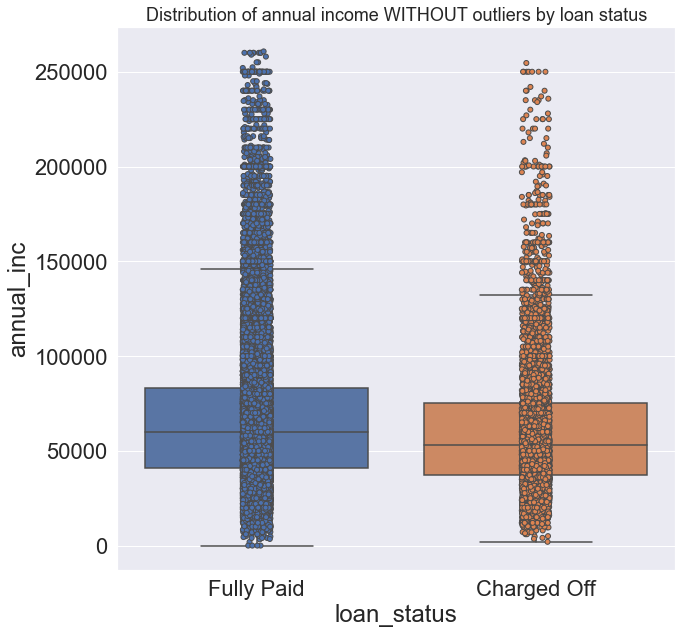

In [95]:
# Boxplot of the annual income dataset WITHOUT outliers
plt.subplots(1,figsize=(10,10))
ax = sns.boxplot(x= 'loan_status', y= 'annual_inc', data=no_outliers_annual_inc, showfliers = False)
ax = sns.stripplot(x= 'loan_status', y= 'annual_inc', data=no_outliers_annual_inc, jitter = 0.05, linewidth=1)
ax.set_title('Distribution of annual income WITHOUT outliers by loan status', fontsize=18)


Distribution of annual income without outliers is highly skewed. Skewness is 1.55


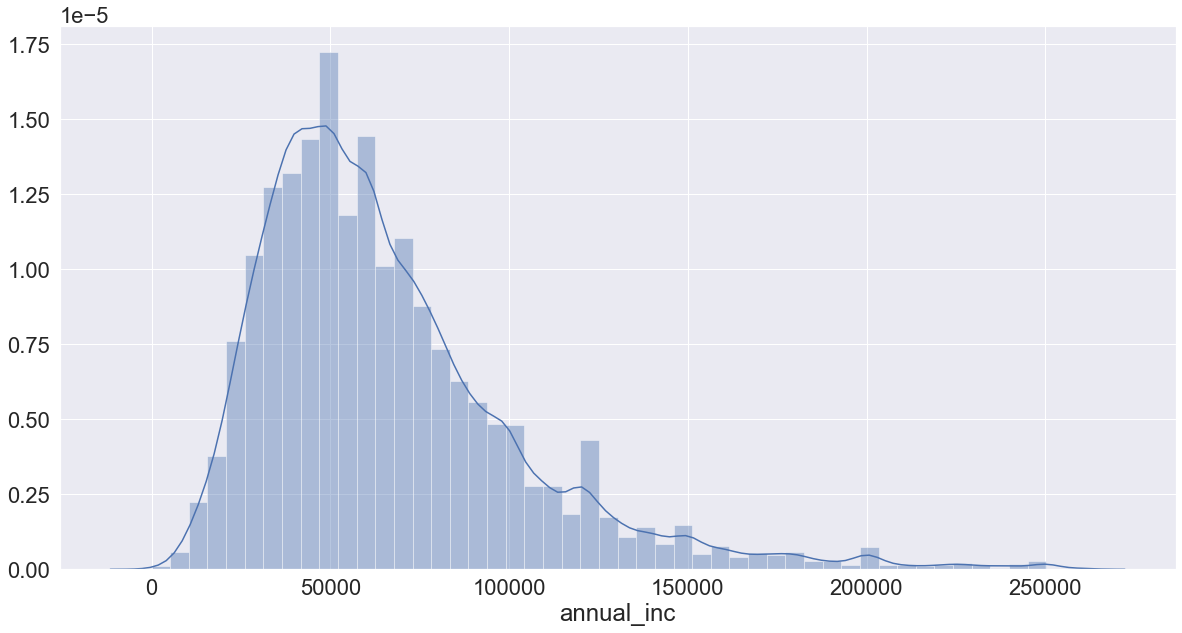

In [96]:
# Distribution of the annual income dataset WITHOUT outliers
plt.subplots(figsize = (20, 10))
sns.distplot(no_outliers_annual_inc['annual_inc'])
#ax.set_title('Distribution of annual income WITHOUT outliers by loan status', fontsize=18)

# Skew value of the annual income
skewness_ann_inc_without_outliers = no_outliers_annual_inc['annual_inc'].skew().round(2)
print('Distribution of annual income without outliers is highly skewed. Skewness is', skewness_ann_inc_without_outliers)

#### Null hypothesis: there is no differece between the high and low annual income and probability of loan default

In [97]:
# Calculating the total number of loans per loan group, with including annual income outlier information
income_outliers_loans = filtered_loans.groupby(['loan_status', 'as_annual_inc_outlier']).size().reset_index(name= 'Count')
income_outliers_loans

loan_status  as_annual_inc_outlier  Count
0  Charged Off                      0   6387
1  Charged Off                      1     44
2   Fully Paid                      0  35807
3   Fully Paid                      1    297

In [98]:
# Calculating the conditional probability of loan default and annual income
income_outliers_loans_transpose = pd.crosstab(filtered_loans['as_annual_inc_outlier'], filtered_loans['loan_status']).reset_index()
income_outliers_loans_transpose

loan_status  as_annual_inc_outlier  Charged Off  Fully Paid
0                                0         6387       35807
1                                1           44         297

#### Chi-square test to investigate wheter there is an association between Fully Paid and Charged Off loans under the annual income category

In [99]:
from scipy.stats import chi2_contingency

obs4 = np.array([[income_outliers_loans_transpose['Fully Paid']], [income_outliers_loans_transpose['Charged Off']]])
chi2_4, p4, dof, ex = chi2_contingency(obs4, correction=False)
print('Chi-square value is:', chi2_4.round(2))
print('P-value =', p4.round(2),'.', 'Test result is not significant (p-value is >0.05).')
print("There is a difference between Fully Paid and Charged Off loans and amount of borrower's annual income.")
print("At this step, the null hypothesis is rejected.")

Chi-square value is: 1.32
P-value = 0.25 . Test result is not significant (p-value is >0.05).
There is a difference between Fully Paid and Charged Off loans and amount of borrower's annual income.
At this step, the null hypothesis is rejected.


In [100]:
# Percentage in as_annual_income_outler group 
annual_inc_with_outliers_percentage = (annual_inc_with_outliers['loan_status'].value_counts()/annual_inc_with_outliers['loan_status'].count()*100, 1)
annual_inc_with_outliers_percentage

(Fully Paid     87.096774
 Charged Off    12.903226
 Name: loan_status, dtype: float64,
 1)

In [101]:
no_outliers_annual_inc_percentage = (no_outliers_annual_inc['loan_status'].value_counts()/no_outliers_annual_inc['loan_status'].count()*100, 1)
no_outliers_annual_inc_percentage

(Fully Paid     84.862777
 Charged Off    15.137223
 Name: loan_status, dtype: float64,
 1)

- There is a difference between amount of borrower's annual income and paying loan and loan default.
- Annual income between the rich borrowers and less earning borrowes is sligthly different. 

### 5. What is the relationship between employment length and probability of loan default?

In [102]:
# Checking emp_length of the borrowers
filtered_loans['emp_length'].describe()

count    42535.000000
mean         4.794381
std          3.608177
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

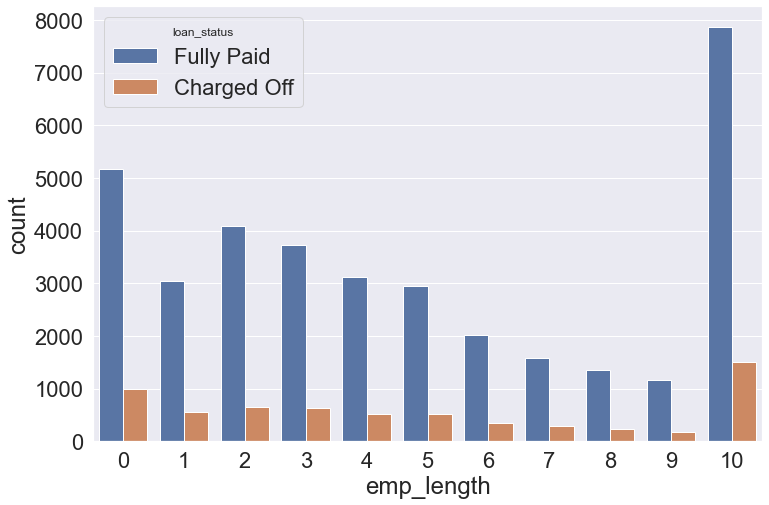

In [103]:
# Distribution of the emp_length in loan groups
plt.subplots(figsize = (12, 8))
sns.countplot(filtered_loans['emp_length'], hue = filtered_loans['loan_status'])

#### Null hypothesis: there is no difference between length of employment and loan default

In [104]:
# Calculating the employment year categories per loan group
emp_len_loans = filtered_loans.groupby(['loan_status', 'emp_length']).size().reset_index(name= 'Count')
emp_len_loans

loan_status  emp_length  Count
0   Charged Off           0    996
1   Charged Off           1    551
2   Charged Off           2    654
3   Charged Off           3    630
4   Charged Off           4    522
5   Charged Off           5    509
6   Charged Off           6    352
7   Charged Off           7    295
8   Charged Off           8    238
9   Charged Off           9    180
10  Charged Off          10   1504
11   Fully Paid           0   5178
12   Fully Paid           1   3044
13   Fully Paid           2   4089
14   Fully Paid           3   3734
15   Fully Paid           4   3127
16   Fully Paid           5   2949
17   Fully Paid           6   2023
18   Fully Paid           7   1580
19   Fully Paid           8   1354
20   Fully Paid           9   1161
21   Fully Paid          10   7865

In [105]:
# Calculating the conditional probability of loan default and employment length
emp_length_loans_transpose = pd.crosstab(filtered_loans['emp_length'], filtered_loans['loan_status']).reset_index()
emp_length_loans_transpose

loan_status  emp_length  Charged Off  Fully Paid
0                     0          996        5178
1                     1          551        3044
2                     2          654        4089
3                     3          630        3734
4                     4          522        3127
5                     5          509        2949
6                     6          352        2023
7                     7          295        1580
8                     8          238        1354
9                     9          180        1161
10                   10         1504        7865

#### Chi-square test to investigate wheter there is an association between Fully Paid and Charged Off loans under the annual income category

In [106]:
from scipy.stats import chi2_contingency

obs5 = np.array([[emp_length_loans_transpose['Fully Paid']], [emp_length_loans_transpose['Charged Off']]])
chi2_5, p5, dof, ex = chi2_contingency(obs5, correction=False)
print('Chi-square value is:', chi2_5.round(2))
print('P-value =', p5.round(3),'.', 'Test result is significant (p-value is <0.05).')
print("There is a no difference between the different length of employment.")
print("The null hypothesis is supported.")

Chi-square value is: 25.62
P-value = 0.004 . Test result is significant (p-value is <0.05).
There is a no difference between the different length of employment.
The null hypothesis is supported.


### 6. What is the relationship between requested loan amount and loan default?

In [107]:
# Statistics for the loan amount, grouped by the loan_status.
filtered_loans.groupby('loan_status')['loan_amnt'].describe()

count          mean          std    min     25%      50%  \
loan_status                                                               
Charged Off   6431.0  11837.428083  7971.073296  500.0  5475.0  10000.0   
Fully Paid   36104.0  10956.538057  7298.745216  500.0  5100.0   9600.0   

                 75%      max  
loan_status                    
Charged Off  16000.0  35000.0  
Fully Paid   15000.0  35000.0

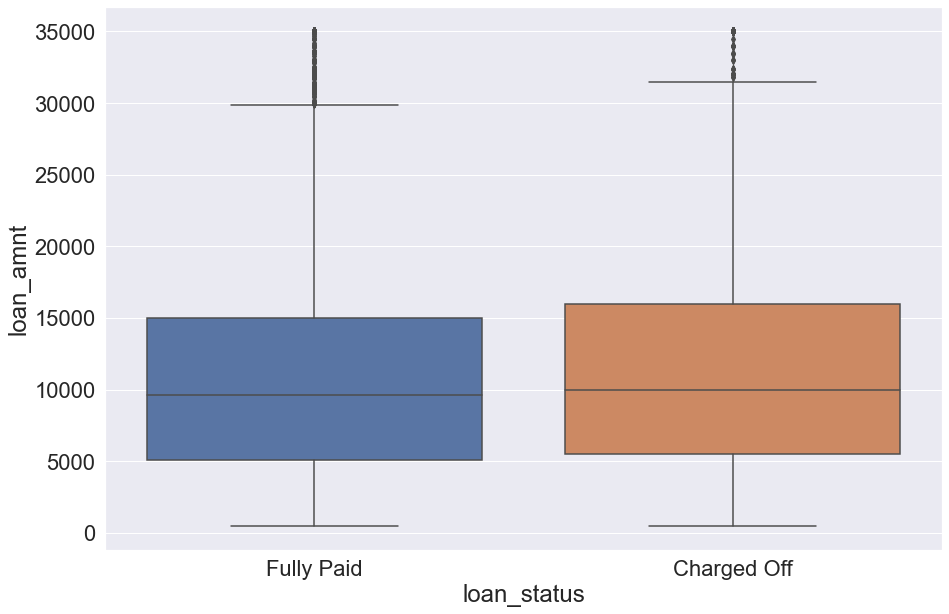

In [108]:
# Boxplot showing the relationship between the loan_status and the loan_amnt
plt.subplots(1, figsize = (15, 10))
sns.boxplot('loan_status','loan_amnt',data=filtered_loans)

- Charged Off loans "loan amount" mean is a bit higher than Fully Paid loans.
- They are outliers in both loan groups.

Loan amount skew is: 1.06
Distribution of loan amount is highly skewed.


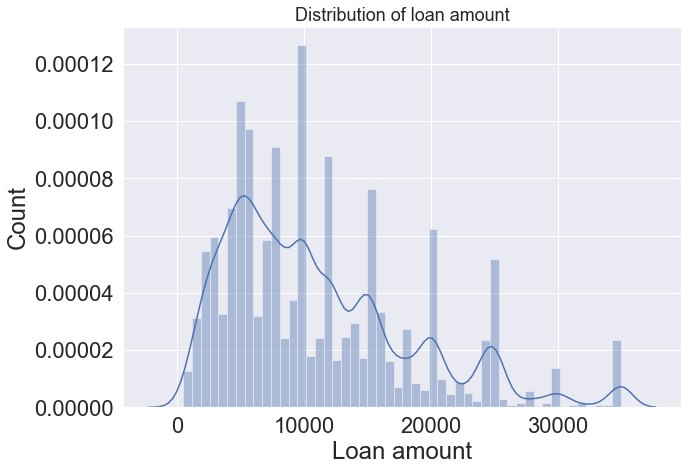

In [109]:
# Histogram of loan_amnt
plt.subplots(1, figsize = (10, 7))
sns.distplot(filtered_loans['loan_amnt'])
plt.ylabel('Count')
plt.xlabel('Loan amount')
plt.title('Distribution of loan amount', fontsize=18)

# Skewness of loan amount
loan_amnt_skew = (filtered_loans['loan_amnt']).skew().round(2)
print('Loan amount skew is:', float(loan_amnt_skew))
print('Distribution of loan amount is highly skewed.')

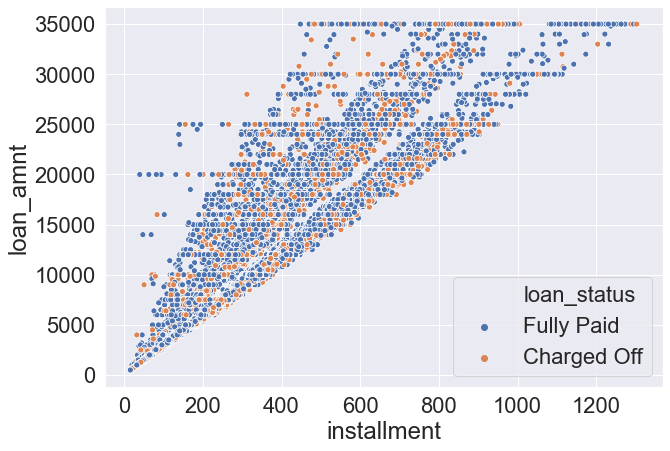

In [110]:
# Scatterplot loan_amnt amount increases as installments increases
plt.subplots(figsize = (10, 7))
sns.scatterplot('installment', 'loan_amnt', data=filtered_loans, hue = filtered_loans['loan_status'])

- There is a linear relationship between loan amount and installment: loan amount increases as installments increases. These observation is resonable.

In [111]:
# Checking outliers in loan amount by using IQR method
Q1 = filtered_loans['loan_amnt'].quantile(0.25)
Q3 = filtered_loans['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1
print('Range of values is: ', filtered_loans['loan_amnt'].max()-filtered_loans['loan_amnt'].min())
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print("The interquartile range (IQR) for loan amount is", IQR)

# Details of outliers
loan_amount_outliers = filtered_loans[((filtered_loans['loan_amnt']- filtered_loans['loan_amnt'].mean()) / filtered_loans['loan_amnt'].std()).abs() > 3]
print('Number of outliers in loan amount: ', loan_amount_outliers['loan_amnt'].count())

Range of values is:  34500.0
1st Quartile (Q1) is:  5200.0
3st Quartile (Q3) is:  15000.0
The interquartile range (IQR) for loan amount is 9800.0
Number of outliers in loan amount:  729


In [112]:
# Grouping outliers 
loan_amount_outliers.groupby('loan_status')[['loan_amnt']].size().reset_index(name = 'count')

loan_status  count
0  Charged Off    161
1   Fully Paid    568

- There are 729 outliers in loan amount. Most of them are from Fully Paid loans (568 outliers).
- Loan amount is self-reported value provided by the borrower. Therefore, it is important to keep these values. Nevertheless, loan income outliers will be marked in separate column as 'as_loan_amnt_outlier'.

(array([  4.,   6.,   0.,  24.,   1.,   0.,   6.,   1.,   2., 685.]),
 array([33425. , 33582.5, 33740. , 33897.5, 34055. , 34212.5, 34370. ,
        34527.5, 34685. , 34842.5, 35000. ]),
 <a list of 10 Patch objects>)

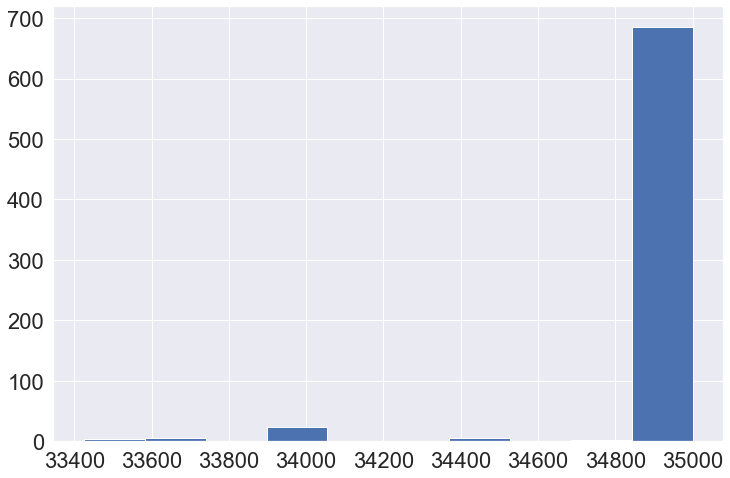

In [113]:
# Plotting loan amount outliers
plt.subplots(figsize = (12, 8))
plt.hist(loan_amount_outliers['loan_amnt'])

Text(0.5, 1.0, 'Distribution of the loan amount outliers by loan status')

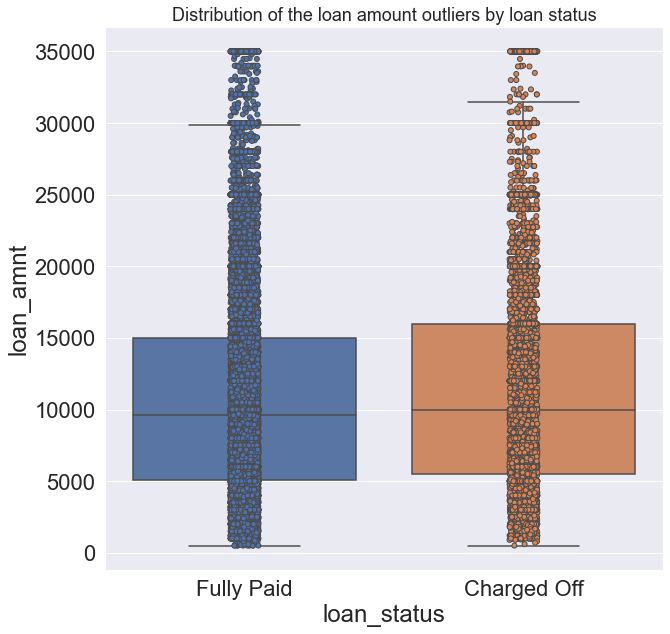

In [114]:
# Boxplot of the loan amount - showing outliers
plt.subplots(1,figsize=(10,10))
ax = sns.boxplot(x= 'loan_status', y= 'loan_amnt', data=filtered_loans, showfliers = False)
ax = sns.stripplot(x= 'loan_status', y= 'loan_amnt', data=filtered_loans, jitter = 0.05, linewidth=1)
ax.set_title('Distribution of the loan amount outliers by loan status', fontsize=18)

In [115]:
# Adding 'loan_amnt_outlier' column to identify if value in loan amount is an outlier

'''
loan_amnt_outlier = 1 - is outlier
loan_amnt_outlier = 0 - is NOT outlier
'''
filtered_loans['as_loan_amnt_outlier'] = np.where((((filtered_loans['loan_amnt'] - filtered_loans['loan_amnt'].mean()) / filtered_loans['loan_amnt'].std()).abs() >3), 1, 0)
filtered_loans['as_loan_amnt_outlier'].unique()

array([0, 1])

In [116]:
filtered_loans['loan_amnt_bin'] = pd.qcut(filtered_loans['loan_amnt'], 10)
filtered_loans['loan_amnt_bin']

0         (3000.0, 5000.0]
1        (499.999, 3000.0]
2        (499.999, 3000.0]
3        (9700.0, 11250.0]
4        (499.999, 3000.0]
               ...        
42530     (3000.0, 5000.0]
42531    (499.999, 3000.0]
42532    (499.999, 3000.0]
42533     (6000.0, 7700.0]
42534     (3000.0, 5000.0]
Name: loan_amnt_bin, Length: 42535, dtype: category
Categories (10, interval[float64]): [(499.999, 3000.0] < (3000.0, 5000.0] < (5000.0, 6000.0] < (6000.0, 7700.0] ... (11250.0, 14000.0] < (14000.0, 16000.0] < (16000.0, 22000.0] < (22000.0, 35000.0]]

In [117]:
# Checking loan_amnt_bin type
filtered_loans['loan_amnt_bin'].dtypes

CategoricalDtype(categories=[(499.999, 3000.0], (3000.0, 5000.0], (5000.0, 6000.0], (6000.0, 7700.0], (7700.0, 9700.0], (9700.0, 11250.0], (11250.0, 14000.0], (14000.0, 16000.0], (16000.0, 22000.0], (22000.0, 35000.0]],
              ordered=True)

#### Null hypothesis: there is no difference between the requested loan amount and loan status

In [118]:
# Numerical binning with quantiles of loan amount values
loan_amount_binning = pd.value_counts((filtered_loans['loan_amnt_bin'])).reset_index()
loan_amount_binning = loan_amount_binning.rename(columns={'index': 'loan_amnt_bin', 'loan_amnt_bin': 'total'})
loan_amount_binning

loan_amnt_bin  total
0    (3000.0, 5000.0]   6232
1  (11250.0, 14000.0]   4760
2  (16000.0, 22000.0]   4374
3   (499.999, 3000.0]   4310
4    (7700.0, 9700.0]   4249
5   (9700.0, 11250.0]   4246
6  (22000.0, 35000.0]   4119
7  (14000.0, 16000.0]   3759
8    (6000.0, 7700.0]   3405
9    (5000.0, 6000.0]   3081

#### Probability of loan default in each bin of loan amount

In [119]:
# Contingency table for loan amount bins and loan group
loan_bins_crosstab = pd.crosstab(filtered_loans['loan_amnt_bin'], filtered_loans['loan_status']).reset_index()
loan_bins_crosstab

loan_status       loan_amnt_bin  Charged Off  Fully Paid
0             (499.999, 3000.0]          654        3656
1              (3000.0, 5000.0]          902        5330
2              (5000.0, 6000.0]          386        2695
3              (6000.0, 7700.0]          469        2936
4              (7700.0, 9700.0]          619        3630
5             (9700.0, 11250.0]          595        3651
6            (11250.0, 14000.0]          657        4103
7            (14000.0, 16000.0]          595        3164
8            (16000.0, 22000.0]          749        3625
9            (22000.0, 35000.0]          805        3314

In [120]:
# Calculating percentage of loan_amnt_bin per total Charged Off loans
loan_bins_all = loan_bins_crosstab.merge(loan_amount_binning, how = 'left', on = 'loan_amnt_bin')
loan_bins_all['ChargedOff_loans_bin_percent'] = (loan_bins_crosstab['Charged Off'] / (loan_amount_binning['total']) * 100).round(2)
loan_bins_all

loan_amnt_bin  Charged Off  Fully Paid  total  \
0   (499.999, 3000.0]          654        3656   4310   
1    (3000.0, 5000.0]          902        5330   6232   
2    (5000.0, 6000.0]          386        2695   3081   
3    (6000.0, 7700.0]          469        2936   3405   
4    (7700.0, 9700.0]          619        3630   4249   
5   (9700.0, 11250.0]          595        3651   4246   
6  (11250.0, 14000.0]          657        4103   4760   
7  (14000.0, 16000.0]          595        3164   3759   
8  (16000.0, 22000.0]          749        3625   4374   
9  (22000.0, 35000.0]          805        3314   4119   

   ChargedOff_loans_bin_percent  
0                         10.49  
1                         18.95  
2                          8.82  
3                         10.88  
4                         14.57  
5                         14.01  
6                         15.95  
7                         15.83  
8                         22.00  
9                         26.13

<ipython-input-145-b5d36b267884>:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(range(10),bins)


Text(0.5, 1.0, 'Percentage of loan default')

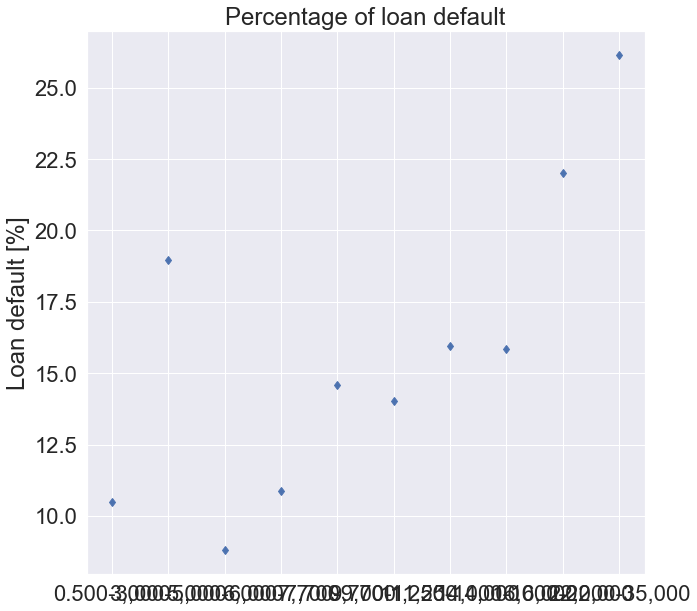

In [145]:
# Plotting the percentage values loan amount bins of in Charged Off loans
plt.subplots(1,figsize=(10,10))
bins = ['0.500-3,000', '3,000-5,000', '5,000-6,000', '6,000-7,700', '7,700-9,700', '9,700-11,250', '11,250-14,000', '14,000-16,000', '16,000-22,000', '22,000-35,000']
loan_bins = loan_bins_crosstab['loan_amnt_bin']
chargedoff_loans_bin_percentage = loan_bins_all['ChargedOff_loans_bin_percent']

plt.plot(bins, chargedoff_loans_bin_percentage, 'd')
ax.set_xticks(range(10),bins)
ax.set_xticklabels(bins, rotation = 45)
plt.ylabel('Loan default [%]')
plt.title('Percentage of loan default')

- The lowest percentage of loan default is (8.82%) is for the low amount of loans (500 -3,000 USD).
- The highest percentage of loan default (26.13%) is for the high amount of loans (22-35,000 USD).

#### Chi-square test to investigate wheter there is an association between Fully Paid and Charged Off loans and loan amount

In [146]:
obs6 = np.array([[loan_bins_all['Fully Paid']], [loan_bins_all['Charged Off']]])
chi2_6, p6, dof, ex = chi2_contingency(obs6, correction=False)

print('Chi-square value is:', chi2_6.round(2))
print('P-value =', p6,'.', 'Test result is significant (p-value is <0.05).')
print("There is a no difference between the loan amount and loan payment.")
print("The null hypothesis is supported.")

Chi-square value is: 112.43
P-value = 4.69530658440314e-20 . Test result is significant (p-value is <0.05).
There is a no difference between the loan amount and loan payment.
The null hypothesis is supported.


Conclusion: There is a no difference between the loan amount and loan default.

In [494]:
filtered_loans.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'desc', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_amnt', 'last_credit_pull_d', 'delinq_amnt',
       'pub_rec_bankruptcies', 'debt_settlement_flag', 'loan_status',
       'credit_policy', 'fico_average', 'FICO_Score_group', 'credit_age',
       'as_annual_inc_outlier', 'as_loan_amnt_outlier', 'loan_amnt_bin'],
      dtype='object')

In [495]:
filtered_loans.shape

(42535, 38)

In [496]:
# Export filtered loan_data into .csv
# Save file as csv
exported_data = filtered_loans.to_csv('./filtered_part_2_Loan_data.csv', index = False)